In [126]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn.objects as so
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore')

In [127]:
# df_oct = pd.read_csv('./data/file_oct.csv')

# s1 = df_oct.sample(n=300000, random_state=42)
# s1.head()

In [128]:
# #Save the DataFrame to a CSV file
# s1.to_csv('./data/oct_data_sample.csv')


In [129]:
s1 = pd.read_csv('./data/oct_data_sample.csv')
s1.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,10257365,2019-10-09 02:46:19 UTC,view,29900078,2059484601444729123,NaN,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa
1,28875143,2019-10-21 16:17:11 UTC,view,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e
2,28709595,2019-10-21 14:42:20 UTC,cart,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3
3,3458568,2019-10-03 18:40:22 UTC,view,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c
4,25352815,2019-10-19 08:58:51 UTC,view,5300097,2053013563173241677,NaN,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b


In [130]:
#let's get rid of unnecessary first column which is just a set of original indexes

s1 = s1.drop(columns=('Unnamed: 0'))
s1.head(n=5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-09 02:46:19 UTC,view,29900078,2059484601444729123,NaN,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa
1,2019-10-21 16:17:11 UTC,view,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e
2,2019-10-21 14:42:20 UTC,cart,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3
3,2019-10-03 18:40:22 UTC,view,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c
4,2019-10-19 08:58:51 UTC,view,5300097,2053013563173241677,NaN,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b


In [131]:
ori_shape = s1.shape      #Named original shape to use later in data preprocessing

In [132]:
s1

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-09 02:46:19 UTC,view,29900078,2059484601444729123,NaN,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa
1,2019-10-21 16:17:11 UTC,view,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e
2,2019-10-21 14:42:20 UTC,cart,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3
3,2019-10-03 18:40:22 UTC,view,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c
4,2019-10-19 08:58:51 UTC,view,5300097,2053013563173241677,NaN,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b
...,...,...,...,...,...,...,...,...,...
299995,2019-10-18 23:56:40 UTC,view,4700534,2053013560899928785,auto.accessories.videoregister,inspector,308.86,513717363,a4e84292-afee-4ad2-a25a-b6add13b9442
299996,2019-10-14 17:19:28 UTC,view,26401462,2053013563651392361,NaN,lucente,124.07,549975096,32887e54-fc30-4045-b875-ec58587ab938
299997,2019-10-09 18:32:24 UTC,view,1003535,2053013555631882655,electronics.smartphone,samsung,460.50,558558445,7593112b-0b1e-404e-b32a-2e8ca0e298fb
299998,2019-10-06 04:30:50 UTC,view,1005162,2053013555631882655,electronics.smartphone,xiaomi,295.76,546222842,3f51134e-b9de-482e-b555-768dabc9cb50


In [133]:
# Checking the datatypes of the attributes
s1.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [134]:
#we need to make all id columns string
s1 = s1.astype({'product_id':'object', 'category_id':'object','user_id':'object'})

In [135]:
s1.dtypes

event_time        object
event_type        object
product_id        object
category_id       object
category_code     object
brand             object
price            float64
user_id           object
user_session      object
dtype: object

In [136]:
s1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-09 02:46:19 UTC,view,29900078,2059484601444729123,NaN,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa
1,2019-10-21 16:17:11 UTC,view,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e
2,2019-10-21 14:42:20 UTC,cart,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3
3,2019-10-03 18:40:22 UTC,view,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c
4,2019-10-19 08:58:51 UTC,view,5300097,2053013563173241677,NaN,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b


In [137]:
# Creating new columns ( Extraction of date and time from the "event_time")
s1['event_time'] = pd.to_datetime(s1['event_time'])
s1['day'] = s1['event_time'].dt.day
s1['month'] = s1['event_time'].dt.month
s1['year'] = s1['event_time'].dt.year


In [138]:
#Creating a 'weekday' Column: 

s1['weekday'] = s1['event_time'].dt.weekday


In [139]:
#Binary 'purchase' Column
s1['purchase'] = (s1['event_type'] == 'purchase').astype(int)


Session Duration:

Calculating the duration of each user session. This is done by grouping the data by 'user_session' and calculating the time difference between the first and last event in each session.

In [140]:

session_duration = s1.groupby('user_session')['event_time'].diff().dt.total_seconds()
s1['session_duration'] = session_duration.fillna(0)  # filling NaN with 0 for the first event in each session


In [141]:
s1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day,month,year,weekday,purchase,session_duration
0,2019-10-09 02:46:19+00:00,view,29900078,2059484601444729123,NaN,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa,9,10,2019,2,0,0.0
1,2019-10-21 16:17:11+00:00,view,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e,21,10,2019,0,0,0.0
2,2019-10-21 14:42:20+00:00,cart,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3,21,10,2019,0,0,0.0
3,2019-10-03 18:40:22+00:00,view,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c,3,10,2019,3,0,0.0
4,2019-10-19 08:58:51+00:00,view,5300097,2053013563173241677,NaN,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b,19,10,2019,5,0,0.0


### Data consistency checking

In [142]:
# Now, let's take a look at the consistency of our data
# Here we need to make sure that the data makes sense to us, so we need to focus on object dtype columns that contain strings to make sure that the values in there make sense

In [143]:
## First, we got many NULL values for category_code and category_id

s1.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code       95703
brand               43500
price                   0
user_id                 0
user_session            0
day                     0
month                   0
year                    0
weekday                 0
purchase                0
session_duration        0
dtype: int64

In [144]:
#let's tune settings so that we can see more data in case we need it

pd.options.display.max_seq_items = 200
pd.options.display.max_rows = 400

In [145]:
# NULL values in category_code take the widest part of our data sample; 
# It's been mentioned in the description of the data that NULL values for category_code mean small non-categorized accessories.
# The rest of the codes make sense - they have been examined manually.

cat_code_counts = pd.DataFrame(s1['category_code'].value_counts(normalize=True, dropna=False))
print('\nTop 20 category code values by their percentage:')
display(cat_code_counts.sort_values(by='category_code', ascending=False).iloc[:20])
print('\nThe shape of the whole table with category codes:')
cat_code_counts.shape


Top 20 category code values by their percentage:


,category_code
NaN,0.319010
electronics.smartphone,0.271110
electronics.clocks,0.031060
computers.notebook,0.026873
electronics.video.tv,0.025927
electronics.audio.headphone,0.025373
appliances.kitchen.refrigerators,0.021367
appliances.kitchen.washer,0.020557
appliances.environment.vacuum,0.018683
apparel.shoes,0.017773



The shape of the whole table with category codes:


(127, 1)

In [146]:
# We see also the biggest part of brands is taken by NULL values; 
# There is no explanation of that. It might be products produced by our marketplace itself, or being under sale by physical people.
# The rest of the brands makes sense - they have been examined manually.

brand_counts = pd.DataFrame(s1['brand'].value_counts(normalize=True, dropna=False))
print('\nTop 20 brand values by their percentage:')
display(brand_counts.sort_values(by='brand', ascending=False).iloc[:20])
print('\nThe shape of the whole table with brands:')
brand_counts.shape


Top 20 brand values by their percentage:


,brand
NaN,0.145000
samsung,0.124720
apple,0.096697
xiaomi,0.072530
huawei,0.026470
lucente,0.015503
lg,0.013327
bosch,0.013307
oppo,0.011310
sony,0.010813



The shape of the whole table with brands:


(2310, 1)

### Outliers checking

### We got only one numeric column - price, so let's check it in terms of outliers

In [147]:
# before we examine the distribution of the price, it's worth saying that seems like we see items with zero price in here,  
# I guess, those are products that are not available for purchasing anymore
#let's how many sich zero-price items we have 

print('\nWe have ' + str(s1[s1['price'] == 0].shape[0]) + ' zero-price items\n')


We have 438 zero-price items



In [148]:
#let's see if they have any purchases 
#as I guessed, these items can't be bought - they are not available for purchasing

s1[s1['price']==0]['event_type'].unique()

array(['view', 'cart'], dtype=object)

In [149]:
#then, there is a sense to drop the rows with these items

s1 = s1[s1['price']>0]

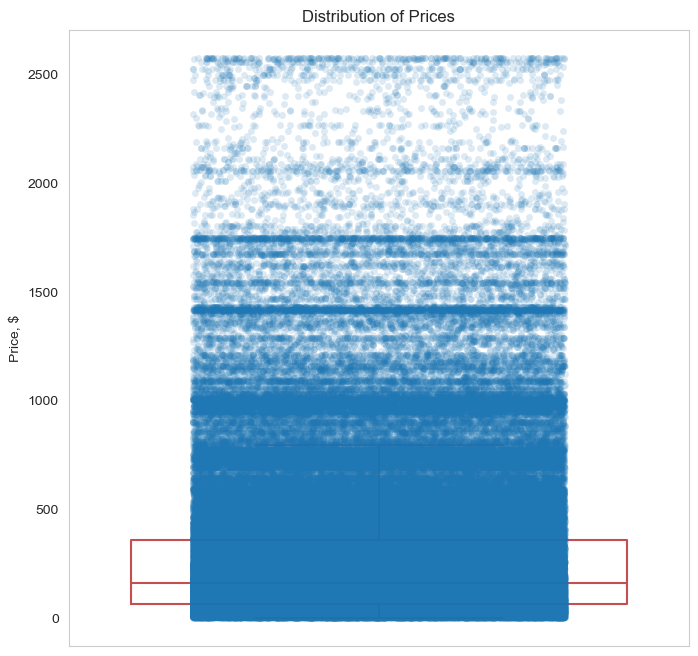

In [150]:
#let's see the distribution of the price once again

plt.figure(figsize=(8,8))
sns.boxplot(data=s1,
            y='price',
            color='r',
            fill=False,
            showfliers = False,
           )
ax = sns.stripplot(
    data =s1,
    y='price',
    alpha=.15,
    jitter = .3,
)

ax.set(
       ylabel='Price, $',
       title = 'Distribution of Prices'
)
plt.show()

###  ↑ We do have expensive items, but it's still not a crime. 
### Let's examine it in terms of number of purchases to see how customers interact with such costly items.

In [151]:
# we got only three types of events

s1['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [152]:
#let's subset purchases only

df_only_purchases = s1[s1['event_type']=='purchase']

In [153]:
#let's make a column that we can use for summarization of purchases 

df_only_purchases=df_only_purchases.assign(purchase_int_record = 1)

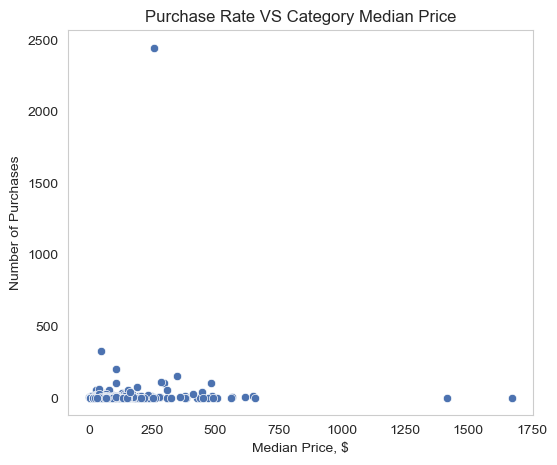

In [154]:
# let's see how categories are being sold
# we don't see any abnormal tendency expect one category around $250 median price

df_only_purchases_aggregation = df_only_purchases.groupby(by='category_id')[['purchase_int_record', 'price']].aggregate({'purchase_int_record':'count',
                                                                                                                         'price':'median'
                                                                                                                        })
plt.figure(figsize=(6,5))
ax = sns.scatterplot(
    data=df_only_purchases_aggregation,
    x='price',
    y='purchase_int_record',
    color='b',
           )
ax.set(xlabel='Median Price, $',
       ylabel='Number of Purchases',
       title = 'Purchase Rate VS Category Median Price'
      )
plt.show()

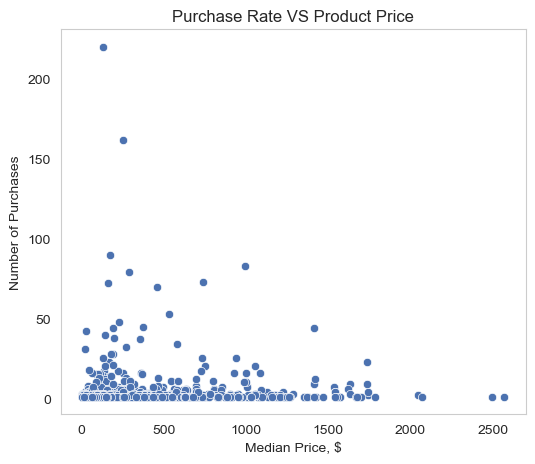

In [155]:
#let's dive deeper and see how the products are being sold
#here we see more understandable visible tendency: less price an item has, more purchases it has (if it's true or not, we will see later)

df_only_purchases_aggregation = df_only_purchases.groupby(by='product_id')[['purchase_int_record', 'price']].aggregate({'purchase_int_record':'count',
                                                                                                                         'price':'median'
                                                                                                                        })
plt.figure(figsize=(6,5))
ax = sns.scatterplot(
    data=df_only_purchases_aggregation,
    x='price',
    y='purchase_int_record',
    color='b',
           )
ax.set(xlabel='Median Price, $',
       ylabel='Number of Purchases',
       title = 'Purchase Rate VS Product Price'
      )
plt.show()

###  ↑ There are no abnormal cases when costly items are purchased frequently, so we see no reason no drop any outliers.

In [156]:
s1.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code       95456
brand               43062
price                   0
user_id                 0
user_session            0
day                     0
month                   0
year                    0
weekday                 0
purchase                0
session_duration        0
dtype: int64

In [157]:
s1['category_code'].fillna('undefined accessories', inplace=True) #Replacing nulls in 'category_code' with 'undefined accessories'
s1['brand'].fillna('undef brand', inplace=True)   #Replacing nulls in 'brand' column with 'undefined brand'

In [158]:
s1.isnull().sum()

event_time          0
event_type          0
product_id          0
category_id         0
category_code       0
brand               0
price               0
user_id             0
user_session        0
day                 0
month               0
year                0
weekday             0
purchase            0
session_duration    0
dtype: int64

In [159]:
#Checking for duplicate values based on all columns as subset
#In that case, we see duplicates
dup = s1[s1.duplicated()]
dup

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day,month,year,weekday,purchase,session_duration
75391,2019-10-16 14:12:41+00:00,cart,3601195,2053013563810775923,appliances.kitchen.washer,beko,236.32,513032906,3c83d2c8-0075-4bf8-bfca-a0ef515329e6,16,10,2019,2,0,0.0
202292,2019-10-04 14:26:44+00:00,cart,1002633,2053013555631882655,electronics.smartphone,apple,358.57,556752493,7eb9466a-d272-4fde-956e-087dcf90ad86,4,10,2019,4,0,0.0
253115,2019-10-16 12:32:39+00:00,cart,1004888,2053013555631882655,electronics.smartphone,samsung,229.71,523569060,e66b8135-ab94-47b2-940c-8e39fa222848,16,10,2019,2,0,0.0


In [160]:
s1.drop_duplicates(inplace=True)

In [161]:
#checking that we have no duplicates anymore

dup = s1[s1.duplicated()]
dup

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day,month,year,weekday,purchase,session_duration


# Research Questions Answers

## Analysing the most popular products, categories,  brands in temrs of purchases.
1. Can we find the top-selling products/product categories/brands?

In [162]:
#copying the df for this specific question to avoid affecting the rest of the code

q1_df = s1
q1_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day,month,year,weekday,purchase,session_duration
0,2019-10-09 02:46:19+00:00,view,29900078,2059484601444729123,undefined accessories,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa,9,10,2019,2,0,0.0
1,2019-10-21 16:17:11+00:00,view,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e,21,10,2019,0,0,0.0
2,2019-10-21 14:42:20+00:00,cart,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3,21,10,2019,0,0,0.0
3,2019-10-03 18:40:22+00:00,view,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c,3,10,2019,3,0,0.0
4,2019-10-19 08:58:51+00:00,view,5300097,2053013563173241677,undefined accessories,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b,19,10,2019,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2019-10-18 23:56:40+00:00,view,4700534,2053013560899928785,auto.accessories.videoregister,inspector,308.86,513717363,a4e84292-afee-4ad2-a25a-b6add13b9442,18,10,2019,4,0,0.0
299996,2019-10-14 17:19:28+00:00,view,26401462,2053013563651392361,undefined accessories,lucente,124.07,549975096,32887e54-fc30-4045-b875-ec58587ab938,14,10,2019,0,0,0.0
299997,2019-10-09 18:32:24+00:00,view,1003535,2053013555631882655,electronics.smartphone,samsung,460.50,558558445,7593112b-0b1e-404e-b32a-2e8ca0e298fb,9,10,2019,2,0,0.0
299998,2019-10-06 04:30:50+00:00,view,1005162,2053013555631882655,electronics.smartphone,xiaomi,295.76,546222842,3f51134e-b9de-482e-b555-768dabc9cb50,6,10,2019,6,0,0.0


In [163]:
#create dummy variables to count purchases

q1_df = pd.get_dummies(q1_df, columns=['event_type'])

In [164]:
q1_df

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,day,month,year,weekday,purchase,session_duration,event_type_cart,event_type_purchase,event_type_view
0,2019-10-09 02:46:19+00:00,29900078,2059484601444729123,undefined accessories,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa,9,10,2019,2,0,0.0,0,0,1
1,2019-10-21 16:17:11+00:00,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e,21,10,2019,0,0,0.0,0,0,1
2,2019-10-21 14:42:20+00:00,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3,21,10,2019,0,0,0.0,1,0,0
3,2019-10-03 18:40:22+00:00,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c,3,10,2019,3,0,0.0,0,0,1
4,2019-10-19 08:58:51+00:00,5300097,2053013563173241677,undefined accessories,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b,19,10,2019,5,0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2019-10-18 23:56:40+00:00,4700534,2053013560899928785,auto.accessories.videoregister,inspector,308.86,513717363,a4e84292-afee-4ad2-a25a-b6add13b9442,18,10,2019,4,0,0.0,0,0,1
299996,2019-10-14 17:19:28+00:00,26401462,2053013563651392361,undefined accessories,lucente,124.07,549975096,32887e54-fc30-4045-b875-ec58587ab938,14,10,2019,0,0,0.0,0,0,1
299997,2019-10-09 18:32:24+00:00,1003535,2053013555631882655,electronics.smartphone,samsung,460.50,558558445,7593112b-0b1e-404e-b32a-2e8ca0e298fb,9,10,2019,2,0,0.0,0,0,1
299998,2019-10-06 04:30:50+00:00,1005162,2053013555631882655,electronics.smartphone,xiaomi,295.76,546222842,3f51134e-b9de-482e-b555-768dabc9cb50,6,10,2019,6,0,0.0,0,0,1


In [165]:
#top 20 selling products

q1_df.groupby(by=['category_code','product_id'], dropna=False
             ).aggregate({'event_type_purchase':'sum'}
                        ).sort_values(by='event_type_purchase', ascending=False).iloc[:20]

event_type_purchase
category_code               product_id                     
electronics.smartphone      1004856                     220
                            1004767                     162
                            1004833                      90
                            1005115                      83
                            1004870                      79
                            1004249                      73
electronics.audio.headphone 4804056                      72
electronics.smartphone      1002544                      70
                            1002524                      53
                            1004836                      48
                            1004873                      45
                            1004741                      44
                            1005105                      44
undefined accessories       5100816                      42
electronics.smartphone      1005100                      40
                            1004750                      38
                            1002633                      37
                            1003306                      34
                            1004785                      32
electronics.audio.headphone 4804295                      31

In [166]:
#top 20 selling categories

q1_df.groupby(by=['category_code'], dropna=False
          ).aggregate({'event_type_purchase':'sum'}
                     ).sort_values(by='event_type_purchase', ascending=False
                                  ).iloc[:20]

,event_type_purchase
category_code,
electronics.smartphone,2445
undefined accessories,1271
electronics.audio.headphone,204
electronics.video.tv,157
electronics.clocks,137
appliances.kitchen.washer,112
computers.notebook,107
appliances.environment.vacuum,104
appliances.kitchen.refrigerators,81


In [167]:
#top 20 selling brands

q1_df.groupby(by=['brand'], dropna=False
          ).aggregate({'event_type_purchase':'sum'}
                     ).sort_values(by='event_type_purchase', ascending=False
                                  ).iloc[:20]

,event_type_purchase
brand,
samsung,1240
apple,1008
undef brand,445
xiaomi,415
huawei,173
lucente,82
cordiant,81
oppo,71
sony,61


### 2. What are the product categories that generate the highest revenue?

In [168]:
categories_pivot = q1_df.groupby(by=['category_code'], dropna=False).aggregate({'event_type_purchase':'sum', 'price':'median'})
categories_pivot.head(n=5)

,event_type_purchase,price
category_code,,
accessories.bag,10,42.52
accessories.umbrella,1,25.48
accessories.wallet,1,46.33
apparel.belt,0,52.51
apparel.costume,4,77.22


In [169]:
#top 20 product categories that generate the highest revenue

categories_pivot['revenue'] = categories_pivot['event_type_purchase']*categories_pivot['price']
categories_revenue_top = categories_pivot.sort_values(by=['revenue'], ascending=False).iloc[:20]
categories_revenue_top

,event_type_purchase,price,revenue
category_code,,,
electronics.smartphone,2445,282.610,690981.450
undefined accessories,1271,83.570,106217.470
computers.notebook,107,565.780,60538.460
electronics.video.tv,157,369.370,57991.090
appliances.kitchen.washer,112,308.860,34592.320
appliances.kitchen.refrigerators,81,292.310,23677.110
electronics.clocks,137,169.620,23237.940
electronics.audio.headphone,204,72.045,14697.180
computers.desktop,30,414.170,12425.100


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'electronics.smartphone'),
  Text(1, 0, 'undefined accessories'),
  Text(2, 0, 'computers.notebook'),
  Text(3, 0, 'electronics.video.tv'),
  Text(4, 0, 'appliances.kitchen.washer'),
  Text(5, 0, 'appliances.kitchen.refrigerators'),
  Text(6, 0, 'electronics.clocks'),
  Text(7, 0, 'electronics.audio.headphone'),
  Text(8, 0, 'computers.desktop'),
  Text(9, 0, 'appliances.environment.vacuum'),
  Text(10, 0, 'electronics.tablet'),
  Text(11, 0, 'auto.accessories.player'),
  Text(12, 0, 'auto.accessories.alarm'),
  Text(13, 0, 'computers.peripherals.printer'),
  Text(14, 0, 'furniture.living_room.cabinet'),
  Text(15, 0, 'apparel.shoes'),
  Text(16, 0, 'auto.accessories.videoregister'),
  Text(17, 0, 'appliances.kitchen.hob'),
  Text(18, 0, 'furniture.bedroom.bed'),
  Text(19, 0, 'appliances.kitchen.microwave')])

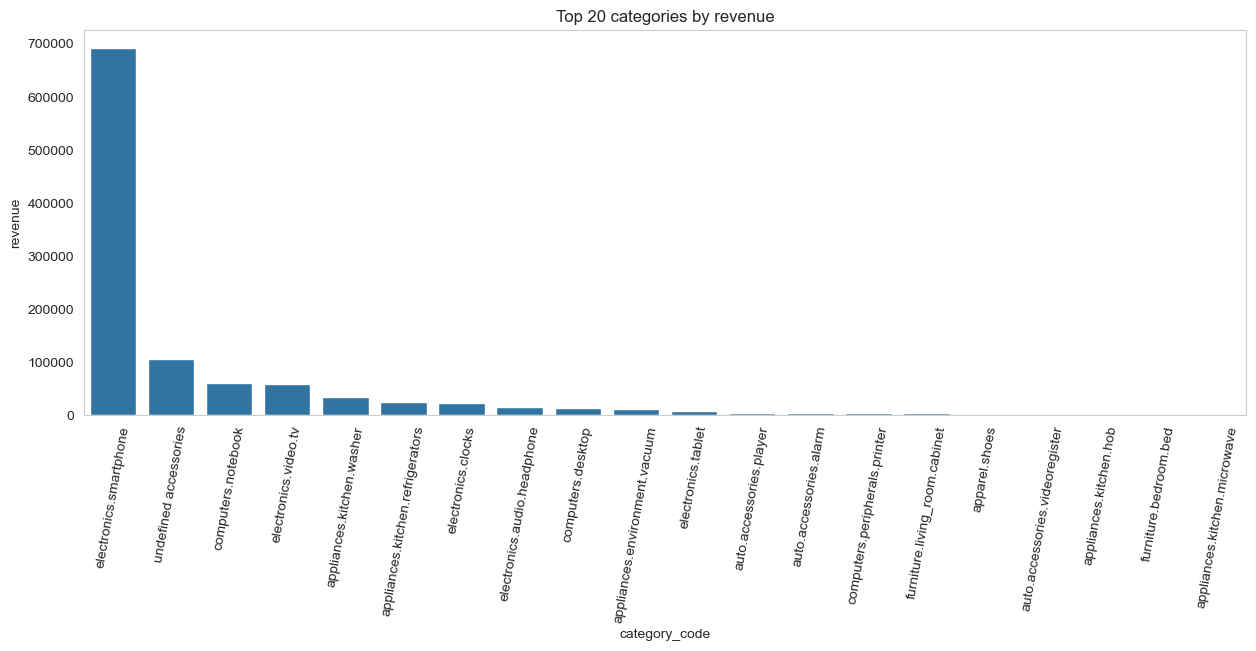

In [170]:
#let's visualize this categories

import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(data=categories_revenue_top, x='category_code', y='revenue')
ax.set(title='Top 20 categories by revenue')
plt.xticks(rotation=80) 

## Analyzing Sales differences over the time:
1. On what day of the month did most sales happen?


In [171]:
s1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day,month,year,weekday,purchase,session_duration
0,2019-10-09 02:46:19+00:00,view,29900078,2059484601444729123,undefined accessories,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa,9,10,2019,2,0,0.0
1,2019-10-21 16:17:11+00:00,view,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e,21,10,2019,0,0,0.0
2,2019-10-21 14:42:20+00:00,cart,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3,21,10,2019,0,0,0.0
3,2019-10-03 18:40:22+00:00,view,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c,3,10,2019,3,0,0.0
4,2019-10-19 08:58:51+00:00,view,5300097,2053013563173241677,undefined accessories,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b,19,10,2019,5,0,0.0


In [172]:
# Creating DataFrame which contains only the purchase events
purchase_df = s1[s1['event_type'] == 'purchase']


In [173]:
s1['day'].unique()

array([ 9, 21,  3, 19, 16,  8, 18, 14, 11, 28, 29, 22, 30, 25,  4, 10,  7,
        2,  5, 27, 24, 23, 31,  6, 13, 26, 20,  1, 17, 15, 12])

In [174]:
# Counting the number of sales for each day of month 
sales_per_day = purchase_df['day'].value_counts().sort_index().reset_index()
sales_per_day.columns = ['day', 'sales_count']
sales_per_day

,day,sales_count
0,1,127
1,2,120
2,3,150
3,4,203
4,5,180
5,6,160
6,7,138
7,8,178
8,9,161
9,10,153


In [175]:
# Finding the day with most sales happened
day_max_sales = sales_per_day.loc[sales_per_day['sales_count'].idxmax()]
day_max_sales

day             14
sales_count    225
Name: 13, dtype: int64

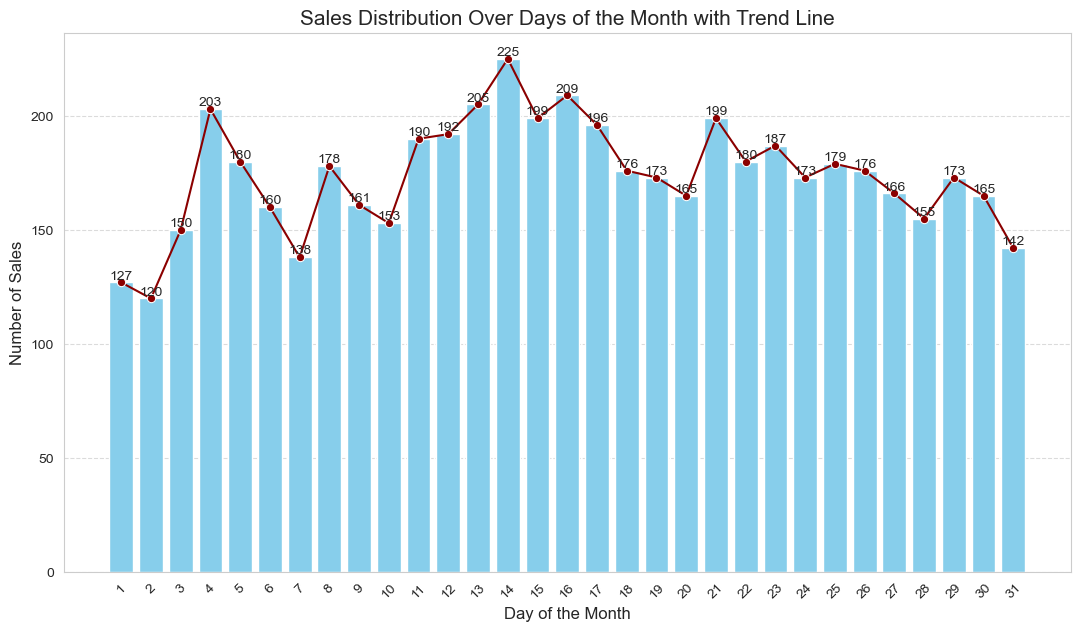

In [176]:
plt.figure(figsize=(13, 7)) 
bars = plt.bar(sales_per_day['day'], sales_per_day['sales_count'], color='skyblue')  # Bar chart with color
sns.lineplot(data=sales_per_day, x='day', y='sales_count', color='darkred', marker='o')  # Trend line
plt.xlabel('Day of the Month', fontsize=12) 
plt.ylabel('Number of Sales', fontsize=12)  
plt.xticks(sales_per_day['day'], fontsize=10, rotation=45) 
plt.yticks(fontsize=10)
plt.title('Sales Distribution Over Days of the Month with Trend Line', fontsize=15)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10)

plt.show()

2. Is there any Week/Weekend Sales difference?


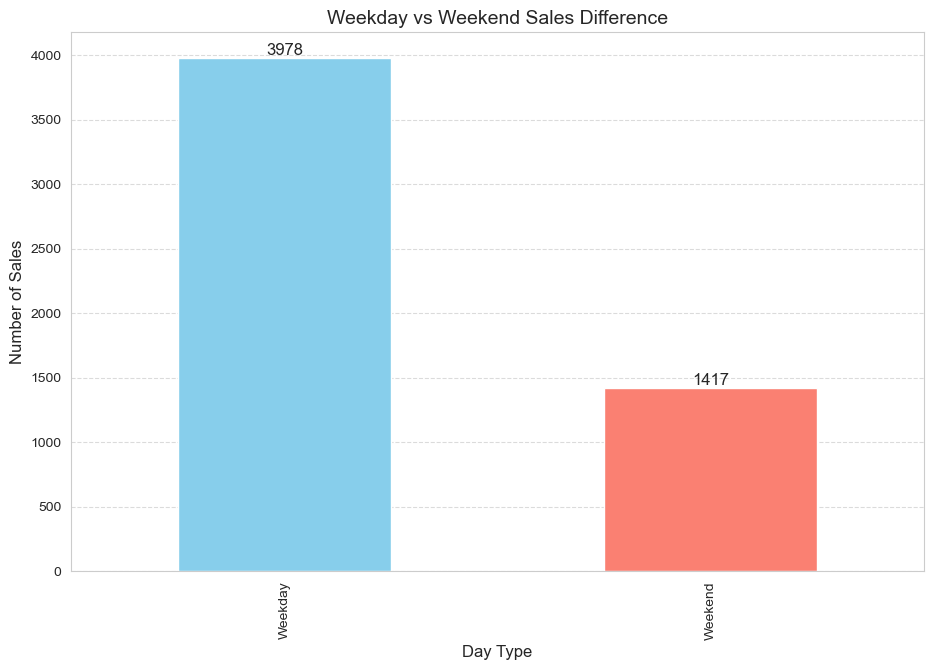

In [177]:

# Extracting day of the week from the 'event_time' column
s1['day_of_week'] = s1['event_time'].dt.dayofweek

# Creating  a DataFrame for purchase events
purchase_s1 = s1[s1['event_type'] == 'purchase']

# giving the figure size
plt.figure(figsize=(11, 7)) 

# Counting the number of sales for weekdays and weekends
sales_weekday_vs_weekend = purchase_s1['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
sales_difference = sales_weekday_vs_weekend.value_counts()

# Ploting the Weekday vs Weekend Sales Difference
sales_difference.plot(kind='bar', color=['skyblue', 'salmon'])

#giving the values for the weekend sales and weekday sales
for index, value in enumerate(sales_difference.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Day Type', fontsize=12) 
plt.ylabel('Number of Sales', fontsize=12)  
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10) 
plt.title('Weekday vs Weekend Sales Difference', fontsize=14)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()



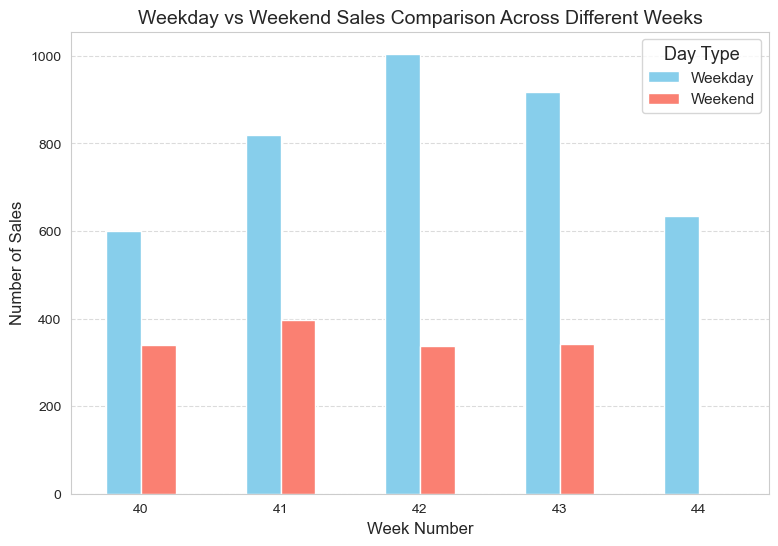

In [178]:
s1['week_number'] = s1['event_time'].dt.isocalendar().week
purchase_s1['week_number'] =purchase_s1['event_time'].dt.isocalendar().week 
# Categorizing days into 'Weekday' and 'Weekend'
purchase_s1['day_type'] = purchase_s1['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


weekly_sales = purchase_s1.groupby(['week_number', 'day_type']).size().unstack()


plt.figure(figsize=(9, 6))
weekly_sales.plot(kind='bar', color=['skyblue', 'salmon'], ax=plt.gca())

plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.title('Weekday vs Weekend Sales Comparison Across Different Weeks', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Day Type', title_fontsize='13', fontsize='11')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

3. Are there any specific times of the day or days of the week when purchases are more frequent?


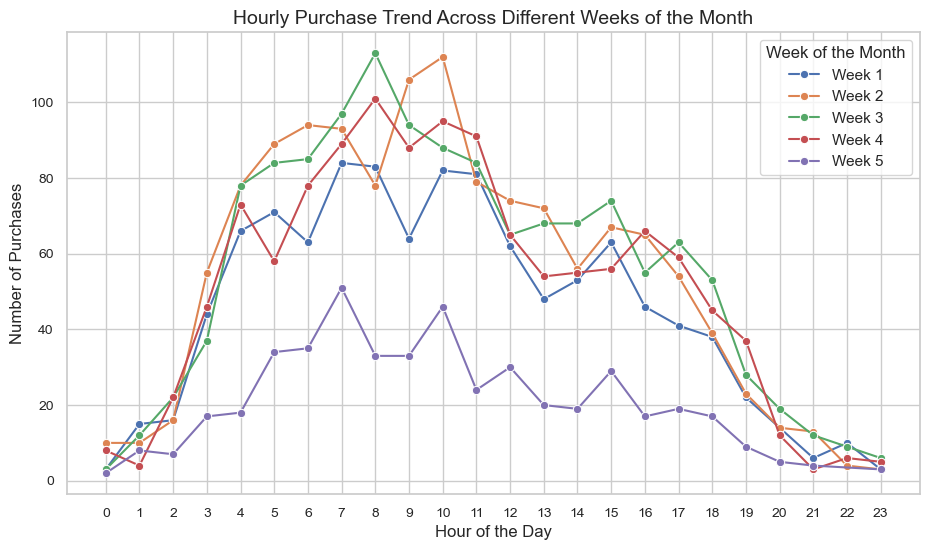

In [179]:

# Extracting  hour of the day from the 'event_time' column
s1['hour_of_day'] = s1['event_time'].dt.hour
purchase_s1['hour_of_day'] = purchase_s1['event_time'].dt.hour
# Extracting week of the month from 'event_time'
s1['week_of_month'] = s1['event_time'].dt.day.apply(lambda x: np.ceil(x/7))
purchase_s1['week_of_month'] = purchase_s1['event_time'].dt.day.apply(lambda x: np.ceil(x/7))



weekly_hourly_purchases = purchase_s1.groupby(['week_of_month', 'hour_of_day']).size().unstack(0)


sns.set(style="whitegrid")
plt.figure(figsize=(11, 6))
for week in weekly_hourly_purchases.columns:
    sns.lineplot(x=weekly_hourly_purchases.index, y=weekly_hourly_purchases[week], marker='o', label=f'Week {int(week)}')

plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.title('Hourly Purchase Trend Across Different Weeks of the Month', fontsize=14)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Week of the Month')
plt.show()


4. Can we find any seasonality of the sales or purchases?

In [180]:
# we got only one month of data here, so there is no sense to answer this question.


# s1['month'] = s1['event_time'].dt.month
# purchase_s1 = s1[s1['event_type'] == 'purchase']
# sales_by_month = purchase_s1['month'].value_counts().sort_index()
# # Ploting the Sales Distribution by Month
# plt.figure(figsize=(10, 6))
# sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, marker='o')
# plt.xlabel('Month')
# plt.ylabel('Number of Sales')
# plt.title('Sales Distribution by Month')
# plt.show()

5. is there any corelation between daytime and purchases?

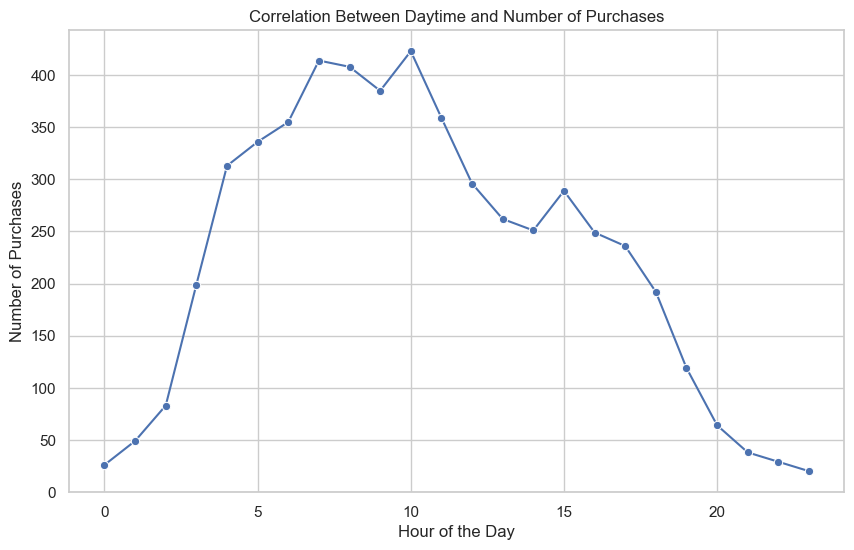

In [181]:

hourly_purchases = purchase_s1.groupby('hour_of_day')['event_type'].count()

# Plot the Correlation Between Daytime and Number of Purchases
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_purchases.index, y=hourly_purchases.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Purchases')
plt.title('Correlation Between Daytime and Number of Purchases')
plt.show()


6. Is there any correlation between the day of the week and the number of purchases?

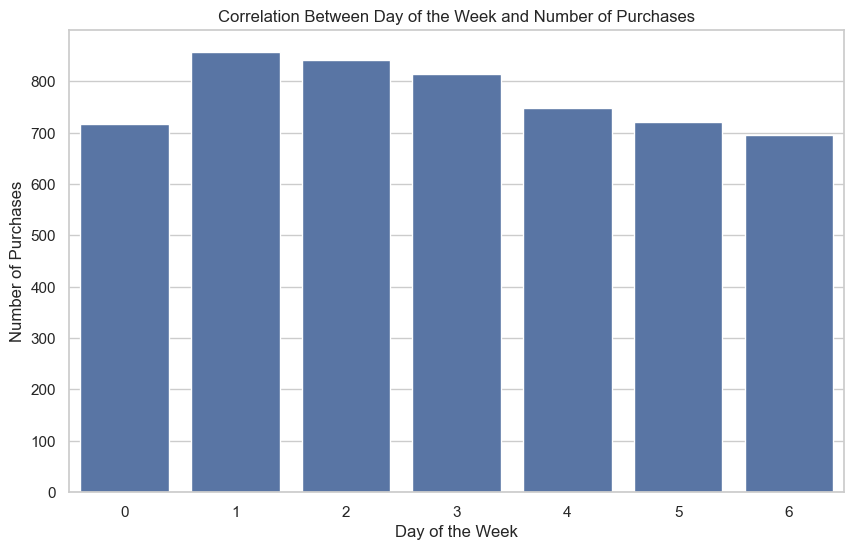

In [182]:
# Group by day of the week and calculate the mean number of purchases
weekday_purchases = purchase_s1.groupby('day_of_week')['event_type'].count()

# Plotting the Correlation Between Day of the Week and Number of Purchases
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_purchases.index, y=weekday_purchases.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Purchases')
plt.title('Correlation Between Day of the Week and Number of Purchases')
plt.show()


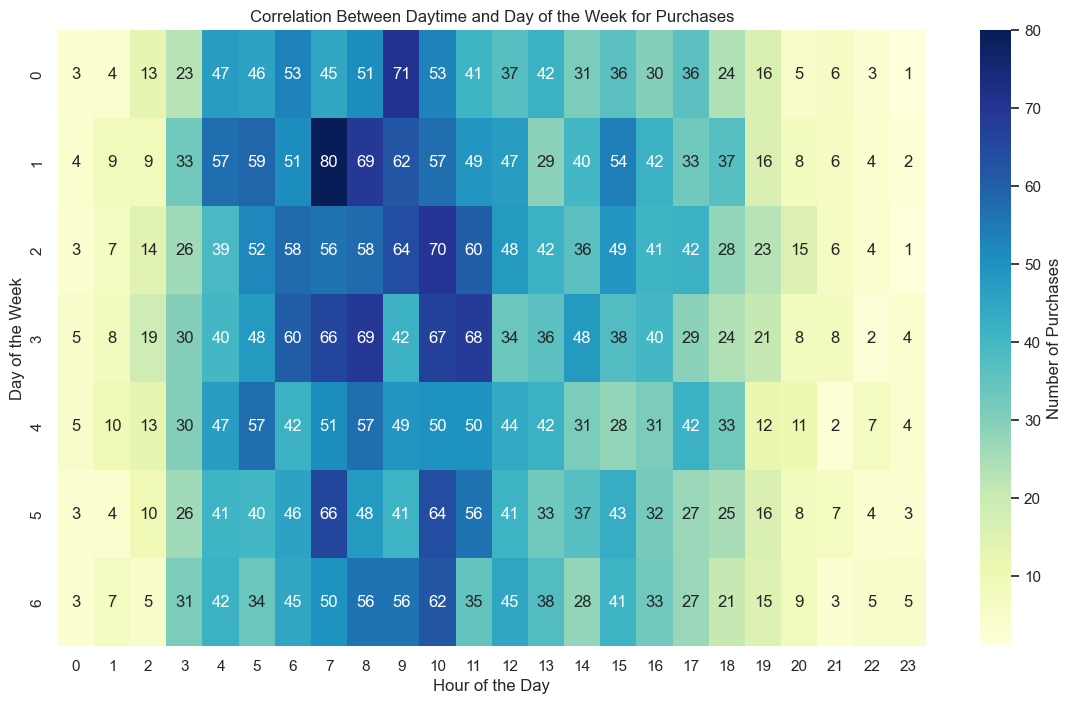

In [183]:
heatmap_data = purchase_s1.groupby(['day_of_week', 'hour_of_day'])['event_type'].count().unstack()

# Plot the Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Purchases'})
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Correlation Between Daytime and Day of the Week for Purchases')
plt.show()


### Market Basket Analysis
We took first 300k rows instead of random rows because we are missing the association rules when the rows are randomly selected

In [184]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [185]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [186]:
s1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day,month,year,weekday,purchase,session_duration,day_of_week,week_number,hour_of_day,week_of_month
0,2019-10-09 02:46:19+00:00,view,29900078,2059484601444729123,undefined accessories,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa,9,10,2019,2,0,0.0,2,41,2,2.0
1,2019-10-21 16:17:11+00:00,view,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e,21,10,2019,0,0,0.0,0,43,16,3.0
2,2019-10-21 14:42:20+00:00,cart,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3,21,10,2019,0,0,0.0,0,43,14,3.0
3,2019-10-03 18:40:22+00:00,view,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c,3,10,2019,3,0,0.0,3,40,18,1.0
4,2019-10-19 08:58:51+00:00,view,5300097,2053013563173241677,undefined accessories,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b,19,10,2019,5,0,0.0,5,42,8,3.0


In [187]:
s1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day,month,year,weekday,purchase,session_duration,day_of_week,week_number,hour_of_day,week_of_month
0,2019-10-09 02:46:19+00:00,view,29900078,2059484601444729123,undefined accessories,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa,9,10,2019,2,0,0.0,2,41,2,2.0
1,2019-10-21 16:17:11+00:00,view,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e,21,10,2019,0,0,0.0,0,43,16,3.0
2,2019-10-21 14:42:20+00:00,cart,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3,21,10,2019,0,0,0.0,0,43,14,3.0
3,2019-10-03 18:40:22+00:00,view,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c,3,10,2019,3,0,0.0,3,40,18,1.0
4,2019-10-19 08:58:51+00:00,view,5300097,2053013563173241677,undefined accessories,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b,19,10,2019,5,0,0.0,5,42,8,3.0


#### find frequently occurring product combinations or pairs using FP Growth  

In [192]:
# we use another dataset to avoid losing the data about regular customers

s2 = pd.read_csv('./data/sample_for_assoc_mining.csv')
s2.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [193]:
s2.dtypes

Unnamed: 0         int64
event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [194]:
# Applying fp-growth algorithm
purchase_data = s2[s2['event_type'] == 'purchase'][['user_id', 'product_id']]
transactions = purchase_data.groupby('user_id')['product_id'].apply(list).reset_index(name='products')

transaction_list = transactions['products'].tolist()

te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Applying FP-growth algorithm to find frequent itemsets
frequent_itemsets = fpgrowth(df_encoded, min_support=0.001, use_colnames=True)

# Generating association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Displaying the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
      support            itemsets
0    0.009474           (1005105)
1    0.002256           (1004875)
2    0.002707           (1307069)
3    0.002256           (1002634)
4    0.004060           (1004857)
5    0.003384           (1004863)
6    0.004963           (1004777)
7    0.004060           (1005006)
8    0.002256           (1005104)
9    0.002256           (1004872)
10   0.012407           (1004249)
11   0.003158           (1004768)
12   0.002256           (1005003)
13   0.001353           (1004990)
14   0.003609           (1004903)
15   0.001128           (1004795)
16   0.001579           (1002547)
17   0.002030           (1801766)
18   0.005640           (1005100)
19   0.001579           (1005098)
20   0.002933           (1004566)
21   0.001805           (1003304)
22   0.008121           (1004750)
23   0.017370           (1004833)
24   0.005414           (1004858)
25   0.002256           (1003310)
26   0.019400           (1005115)
27   0.001353           (1004

In [195]:
from IPython.display import display

products_list = [1004856, 1004833, 1004870, 1004767, 1004856, 1004767, 1002544, 1004767]
for product_id in products_list:
    product_info = s2[s2['product_id'] == product_id][:1][['category_code', 'brand', 'product_id']]
    
    display(f"Product ID: {product_id}")
    display(product_info)


'Product ID: 1004856'

,category_code,brand,product_id
79,electronics.smartphone,samsung,1004856


'Product ID: 1004833'

,category_code,brand,product_id
427,electronics.smartphone,samsung,1004833


'Product ID: 1004870'

,category_code,brand,product_id
76,electronics.smartphone,samsung,1004870


'Product ID: 1004767'

,category_code,brand,product_id
49,electronics.smartphone,samsung,1004767


'Product ID: 1004856'

,category_code,brand,product_id
79,electronics.smartphone,samsung,1004856


'Product ID: 1004767'

,category_code,brand,product_id
49,electronics.smartphone,samsung,1004767


'Product ID: 1002544'

,category_code,brand,product_id
57,electronics.smartphone,apple,1002544


'Product ID: 1004767'

,category_code,brand,product_id
49,electronics.smartphone,samsung,1004767


In [196]:
pip install prettytable


Note: you may need to restart the kernel to use updated packages.


In [197]:
# displaying the association rules along with the brand and category
from IPython.display import display
from prettytable import PrettyTable

products_list = [1004856, 1004833, 1004870, 1004767, 1004856, 1004767, 1002544, 1004767]

table = PrettyTable()
table.field_names = ["Product ID", "Category Code", "Brand"]

for product_id in products_list:
    product_info = s2[s2['product_id'] == product_id][:1][['category_code', 'brand', 'product_id']]
    if not product_info.empty:
        table.add_row([product_info.iloc[0]['product_id'], product_info.iloc[0]['category_code'], product_info.iloc[0]['brand']])

# Displaying the table
display(table)


Product ID,Category Code,Brand
1004856,electronics.smartphone,samsung
1004833,electronics.smartphone,samsung
1004870,electronics.smartphone,samsung
1004767,electronics.smartphone,samsung
1004856,electronics.smartphone,samsung
1004767,electronics.smartphone,samsung
1002544,electronics.smartphone,apple
1004767,electronics.smartphone,samsung


#### Finding using Apriori Algorithm

In [198]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
purchase_data = s2[s2['event_type'] == 'purchase'][['user_session', 'product_id']]

transactions = purchase_data.groupby('user_session')['product_id'].apply(list).reset_index(name='products')
transaction_list = transactions['products'].tolist()
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Applying Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)

# Generating association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Displaying the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
      support            itemsets
0    0.007816           (1002524)
1    0.001645           (1002532)
2    0.017483           (1002544)
3    0.001440           (1002547)
4    0.001028           (1002548)
5    0.002057           (1002629)
6    0.007610           (1002633)
7    0.002057           (1002634)
8    0.001645           (1003304)
9    0.004319           (1003306)
10   0.002057           (1003310)
11   0.001440           (1003312)
12   0.003497           (1003316)
13   0.005759           (1003317)
14   0.001851           (1003363)
15   0.001028           (1004133)
16   0.004936           (1004209)
17   0.001234           (1004210)
18   0.002674           (1004227)
19   0.003908           (1004237)
20   0.002674           (1004238)
21   0.001028           (1004240)
22   0.003291           (1004246)
23   0.001645           (1004247)
24   0.011724           (1004249)
25   0.002468           (1004250)
26   0.001028           (1004252)
27   0.003702           (1004

<Figure size 1200x800 with 0 Axes>

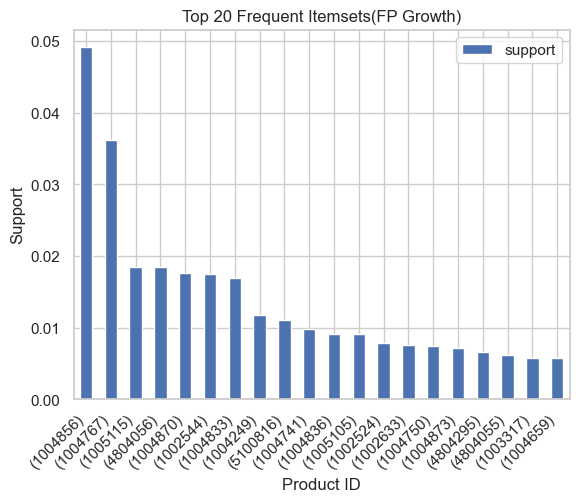

In [199]:

top_n = 20
top_itemsets = frequent_itemsets.nlargest(top_n, 'support')

plt.figure(figsize=(12, 8))
top_itemsets.plot(kind='bar', x='itemsets', y='support')
plt.xlabel('Product ID')
plt.ylabel('Support')
plt.title('Top {} Frequent Itemsets(FP Growth)'.format(top_n))
plt.xticks(rotation=45, ha='right')  
plt.show()

<Figure size 1200x800 with 0 Axes>

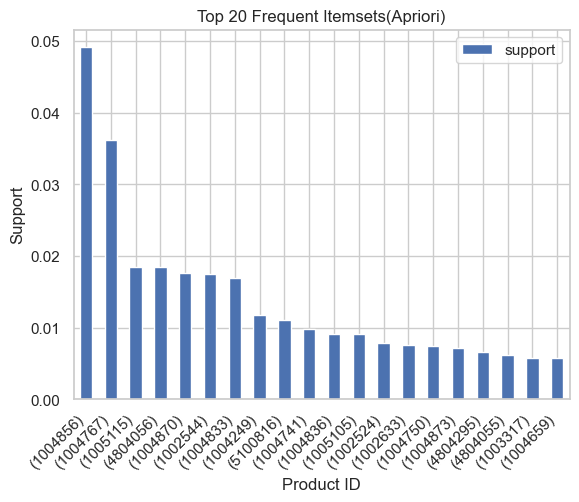

In [200]:
top_n = 20
top_itemsets = frequent_itemsets.nlargest(top_n, 'support')
plt.figure(figsize=(12, 8))
top_itemsets.plot(kind='bar', x='itemsets', y='support')
plt.xlabel('Product ID')
plt.ylabel('Support')
plt.title('Top {} Frequent Itemsets(Apriori)'.format(top_n))
plt.xticks(rotation=45, ha='right')  
plt.show()

## Question 1: Conversion analysis. What are the most viewed products and do these views lead to purchases?

### Let's create: 1) top 20 vievers; 3) top 20 ratio sell/view

In [201]:
s1

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day,month,year,weekday,purchase,session_duration,day_of_week,week_number,hour_of_day,week_of_month
0,2019-10-09 02:46:19+00:00,view,29900078,2059484601444729123,undefined accessories,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa,9,10,2019,2,0,0.0,2,41,2,2.0
1,2019-10-21 16:17:11+00:00,view,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e,21,10,2019,0,0,0.0,0,43,16,3.0
2,2019-10-21 14:42:20+00:00,cart,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3,21,10,2019,0,0,0.0,0,43,14,3.0
3,2019-10-03 18:40:22+00:00,view,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c,3,10,2019,3,0,0.0,3,40,18,1.0
4,2019-10-19 08:58:51+00:00,view,5300097,2053013563173241677,undefined accessories,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b,19,10,2019,5,0,0.0,5,42,8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2019-10-18 23:56:40+00:00,view,4700534,2053013560899928785,auto.accessories.videoregister,inspector,308.86,513717363,a4e84292-afee-4ad2-a25a-b6add13b9442,18,10,2019,4,0,0.0,4,42,23,3.0
299996,2019-10-14 17:19:28+00:00,view,26401462,2053013563651392361,undefined accessories,lucente,124.07,549975096,32887e54-fc30-4045-b875-ec58587ab938,14,10,2019,0,0,0.0,0,42,17,2.0
299997,2019-10-09 18:32:24+00:00,view,1003535,2053013555631882655,electronics.smartphone,samsung,460.50,558558445,7593112b-0b1e-404e-b32a-2e8ca0e298fb,9,10,2019,2,0,0.0,2,41,18,2.0
299998,2019-10-06 04:30:50+00:00,view,1005162,2053013555631882655,electronics.smartphone,xiaomi,295.76,546222842,3f51134e-b9de-482e-b555-768dabc9cb50,6,10,2019,6,0,0.0,6,40,4,1.0


In [202]:
#let's do one-hot encoding for different events to be able to count them
df_encoded = pd.get_dummies(data=s1, columns=['event_type'])
df_encoded

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,day,month,...,weekday,purchase,session_duration,day_of_week,week_number,hour_of_day,week_of_month,event_type_cart,event_type_purchase,event_type_view
0,2019-10-09 02:46:19+00:00,29900078,2059484601444729123,undefined accessories,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa,9,10,...,2,0,0.0,2,41,2,2.0,0,0,1
1,2019-10-21 16:17:11+00:00,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e,21,10,...,0,0,0.0,0,43,16,3.0,0,0,1
2,2019-10-21 14:42:20+00:00,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3,21,10,...,0,0,0.0,0,43,14,3.0,1,0,0
3,2019-10-03 18:40:22+00:00,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c,3,10,...,3,0,0.0,3,40,18,1.0,0,0,1
4,2019-10-19 08:58:51+00:00,5300097,2053013563173241677,undefined accessories,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b,19,10,...,5,0,0.0,5,42,8,3.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2019-10-18 23:56:40+00:00,4700534,2053013560899928785,auto.accessories.videoregister,inspector,308.86,513717363,a4e84292-afee-4ad2-a25a-b6add13b9442,18,10,...,4,0,0.0,4,42,23,3.0,0,0,1
299996,2019-10-14 17:19:28+00:00,26401462,2053013563651392361,undefined accessories,lucente,124.07,549975096,32887e54-fc30-4045-b875-ec58587ab938,14,10,...,0,0,0.0,0,42,17,2.0,0,0,1
299997,2019-10-09 18:32:24+00:00,1003535,2053013555631882655,electronics.smartphone,samsung,460.50,558558445,7593112b-0b1e-404e-b32a-2e8ca0e298fb,9,10,...,2,0,0.0,2,41,18,2.0,0,0,1
299998,2019-10-06 04:30:50+00:00,1005162,2053013555631882655,electronics.smartphone,xiaomi,295.76,546222842,3f51134e-b9de-482e-b555-768dabc9cb50,6,10,...,6,0,0.0,6,40,4,1.0,0,0,1


In [203]:
#let's create the table grouped by categories and aggregated by number of views, purchase, conversion, with extra conversion rank
#we have rank 1-102, where 1 is the best rank; also, we have rank = 0 when an item has 0 purchases, if rank = NaN, then an item has zero views

df_encoded_grouped = df_encoded.groupby(by=['category_code','product_id'])[['event_type_view','event_type_purchase']].sum().sort_values(by=['event_type_view'], ascending=False)
df_encoded_grouped['conversion'] = (df_encoded_grouped['event_type_purchase']/df_encoded_grouped['event_type_view']).round(3)
df_encoded_grouped['conversion_rank'] = round((df_encoded_grouped['conversion'].rank(ascending=False))/100, 0)
df_encoded_grouped

event_type_view  \
category_code                          product_id                    
electronics.smartphone                 1004856                2938   
                                       1004767                2807   
                                       1005115                2328   
                                       1004249                1398   
                                       1005105                1361   
...                                                            ...   
undefined accessories                  12800096                  0   
appliances.environment.air_conditioner 4201024                   0   
undefined accessories                  23500006                  0   
appliances.personal.scales             11200361                  0   
apparel.shoes.keds                     28720613                  0   

                                                   event_type_purchase  \
category_code                          product_id                        
electronics.smartphone                 1004856                     220   
                                       1004767                     162   
                                       1005115                      83   
                                       1004249                      73   
                                       1005105                      44   
...                                                                ...   
undefined accessories                  12800096                      0   
appliances.environment.air_conditioner 4201024                       1   
undefined accessories                  23500006                      1   
appliances.personal.scales             11200361                      1   
apparel.shoes.keds                     28720613                      1   

                                                   conversion  conversion_rank  
category_code                          product_id                               
electronics.smartphone                 1004856          0.075             12.0  
                                       1004767          0.058             14.0  
                                       1005115          0.036             18.0  
                                       1004249          0.052             15.0  
                                       1005105          0.032             18.0  
...                                                       ...              ...  
undefined accessories                  12800096           NaN              NaN  
appliances.environment.air_conditioner 4201024            inf              1.0  
undefined accessories                  23500006           inf              1.0  
appliances.personal.scales             11200361           inf              1.0  
apparel.shoes.keds                     28720613           inf              1.0  

[50331 rows x 4 columns]

In [204]:
print('We have ' + str(df_encoded_grouped[df_encoded_grouped['conversion']==float('inf')].shape[0]) + ' items with non-zero purchases and zero views (infinity conversion)')

We have 141 items with non-zero purchases and zero views (infinity conversion)


In [205]:
#let's replace infinity conversions with a high value that stands out

#let's drop items with infinity conversion
#df_encoded_grouped = df_encoded_grouped[df_encoded_grouped['conversion']!=float('inf')]

df_encoded_grouped['conversion']=df_encoded_grouped['conversion'].replace({float('inf'):7})
df_encoded_grouped

event_type_view  \
category_code                          product_id                    
electronics.smartphone                 1004856                2938   
                                       1004767                2807   
                                       1005115                2328   
                                       1004249                1398   
                                       1005105                1361   
...                                                            ...   
undefined accessories                  12800096                  0   
appliances.environment.air_conditioner 4201024                   0   
undefined accessories                  23500006                  0   
appliances.personal.scales             11200361                  0   
apparel.shoes.keds                     28720613                  0   

                                                   event_type_purchase  \
category_code                          product_id                        
electronics.smartphone                 1004856                     220   
                                       1004767                     162   
                                       1005115                      83   
                                       1004249                      73   
                                       1005105                      44   
...                                                                ...   
undefined accessories                  12800096                      0   
appliances.environment.air_conditioner 4201024                       1   
undefined accessories                  23500006                      1   
appliances.personal.scales             11200361                      1   
apparel.shoes.keds                     28720613                      1   

                                                   conversion  conversion_rank  
category_code                          product_id                               
electronics.smartphone                 1004856          0.075             12.0  
                                       1004767          0.058             14.0  
                                       1005115          0.036             18.0  
                                       1004249          0.052             15.0  
                                       1005105          0.032             18.0  
...                                                       ...              ...  
undefined accessories                  12800096           NaN              NaN  
appliances.environment.air_conditioner 4201024          7.000              1.0  
undefined accessories                  23500006         7.000              1.0  
appliances.personal.scales             11200361         7.000              1.0  
apparel.shoes.keds                     28720613         7.000              1.0  

[50331 rows x 4 columns]

In [206]:
# here is the top 20 viewers
# based on ranking, we have no items with rank <= 12

df_encoded_grouped_sorted_top_views = df_encoded_grouped.iloc[:20]
df_encoded_grouped_sorted_top_views

event_type_view  event_type_purchase  \
category_code               product_id                                         
electronics.smartphone      1004856                2938                  220   
                            1004767                2807                  162   
                            1005115                2328                   83   
                            1004249                1398                   73   
                            1005105                1361                   44   
                            1004833                1345                   90   
                            1004870                1343                   79   
                            1002544                1267                   70   
electronics.audio.headphone 4804056                1237                   72   
undefined accessories       5100816                1220                   42   
electronics.smartphone      1004741                1058                   44   
                            1004836                1037                   48   
                            1005160                1016                   17   
                            1004739                 961                   28   
                            1004873                 958                   45   
                            1004785                 844                   32   
                            1005100                 815                   40   
                            1002633                 809                   37   
                            1002524                 801                   53   
                            1004750                 771                   38   

                                        conversion  conversion_rank  
category_code               product_id                               
electronics.smartphone      1004856          0.075             12.0  
                            1004767          0.058             14.0  
                            1005115          0.036             18.0  
                            1004249          0.052             15.0  
                            1005105          0.032             18.0  
                            1004833          0.067             12.0  
                            1004870          0.059             13.0  
                            1002544          0.055             14.0  
electronics.audio.headphone 4804056          0.058             14.0  
undefined accessories       5100816          0.034             18.0  
electronics.smartphone      1004741          0.042             16.0  
                            1004836          0.046             16.0  
                            1005160          0.017             21.0  
                            1004739          0.029             19.0  
                            1004873          0.047             15.0  
                            1004785          0.038             17.0  
                            1005100          0.049             15.0  
                            1002633          0.046             16.0  
                            1002524          0.066             13.0  
                            1004750          0.049             15.0

In [207]:
# let's see some key quantiles of the view distribution

print('The 99.96th percentile of views across all market ' + str(df_encoded_grouped['event_type_view'].quantile(0.9996)))
print('The 98th percentile of views across all market ' + str(df_encoded_grouped['event_type_view'].quantile(0.98)))
print('The 95th percentile of views across all market ' + str(df_encoded_grouped['event_type_view'].quantile(0.95)))
print('The mean number (~85th percentile) of views across all market ' + str(df_encoded_grouped['event_type_view'].mean()))
print('The median number (50th percentile) of views across all market ' + str(df_encoded_grouped['event_type_view'].median()))

The 99.96th percentile of views across all market 743.8680000000022
The 98th percentile of views across all market 37.0
The 95th percentile of views across all market 17.0
The mean number (~85th percentile) of views across all market 5.715443762293616
The median number (50th percentile) of views across all market 2.0


In [208]:
# here is the top 20 buyers

df_encoded_grouped_sorted_top_purchases = df_encoded_grouped.sort_values(by=['event_type_purchase'], ascending=False).iloc[:20]
df_encoded_grouped_sorted_top_purchases

event_type_view  event_type_purchase  \
category_code               product_id                                         
electronics.smartphone      1004856                2938                  220   
                            1004767                2807                  162   
                            1004833                1345                   90   
                            1005115                2328                   83   
                            1004870                1343                   79   
                            1004249                1398                   73   
electronics.audio.headphone 4804056                1237                   72   
electronics.smartphone      1002544                1267                   70   
                            1002524                 801                   53   
                            1004836                1037                   48   
                            1004873                 958                   45   
                            1005105                1361                   44   
                            1004741                1058                   44   
undefined accessories       5100816                1220                   42   
electronics.smartphone      1005100                 815                   40   
                            1004750                 771                   38   
                            1002633                 809                   37   
                            1003306                 726                   34   
                            1004785                 844                   32   
electronics.audio.headphone 4804295                 743                   31   

                                        conversion  conversion_rank  
category_code               product_id                               
electronics.smartphone      1004856          0.075             12.0  
                            1004767          0.058             14.0  
                            1004833          0.067             12.0  
                            1005115          0.036             18.0  
                            1004870          0.059             13.0  
                            1004249          0.052             15.0  
electronics.audio.headphone 4804056          0.058             14.0  
electronics.smartphone      1002544          0.055             14.0  
                            1002524          0.066             13.0  
                            1004836          0.046             16.0  
                            1004873          0.047             15.0  
                            1005105          0.032             18.0  
                            1004741          0.042             16.0  
undefined accessories       5100816          0.034             18.0  
electronics.smartphone      1005100          0.049             15.0  
                            1004750          0.049             15.0  
                            1002633          0.046             16.0  
                            1003306          0.047             15.0  
                            1004785          0.038             17.0  
electronics.audio.headphone 4804295          0.042             16.0

In [209]:
# this is top 20 items soted by ratio purchases to views for items that have >= 98th percentile number of views
# based on ranking, we have no items with rank <= 9
# why we filter them in this way? because there are items with 1 view and 1 purchase (that is conversion=1), so we need to filter out unpopular items

df_encoded_grouped_sorted_top_conversion = (
    df_encoded_grouped[df_encoded_grouped['event_type_view']>=df_encoded_grouped['event_type_view'].quantile(0.98)]
    .sort_values(by=['conversion'], ascending=False)
    .iloc[:20]
)

df_encoded_grouped_sorted_top_conversion

event_type_view  \
category_code                 product_id                    
undefined accessories         12701293                 48   
                              5300157                  60   
electronics.clocks            5100562                 118   
undefined accessories         12703493                 71   
electronics.smartphone        1005130                  71   
                              1005009                  61   
undefined accessories         8500461                  37   
electronics.clocks            5100855                 135   
undefined accessories         3300315                  50   
                              12706857                 38   
appliances.environment.vacuum 3700677                  38   
undefined accessories         12709556                 51   
electronics.audio.headphone   4801876                  39   
appliances.kitchen.washer     3600231                  66   
electronics.smartphone        1004863                 187   
                              1004856                2938   
                              1005143                  53   
undefined accessories         12701602                 43   
                              26400194                 57   
electronics.smartphone        1005113                  72   

                                          event_type_purchase  conversion  \
category_code                 product_id                                    
undefined accessories         12701293                      6       0.125   
                              5300157                       7       0.117   
electronics.clocks            5100562                      11       0.093   
undefined accessories         12703493                      6       0.085   
electronics.smartphone        1005130                       6       0.085   
                              1005009                       5       0.082   
undefined accessories         8500461                       3       0.081   
electronics.clocks            5100855                      11       0.081   
undefined accessories         3300315                       4       0.080   
                              12706857                      3       0.079   
appliances.environment.vacuum 3700677                       3       0.079   
undefined accessories         12709556                      4       0.078   
electronics.audio.headphone   4801876                       3       0.077   
appliances.kitchen.washer     3600231                       5       0.076   
electronics.smartphone        1004863                      14       0.075   
                              1004856                     220       0.075   
                              1005143                       4       0.075   
undefined accessories         12701602                      3       0.070   
                              26400194                      4       0.070   
electronics.smartphone        1005113                       5       0.069   

                                          conversion_rank  
category_code                 product_id                   
undefined accessories         12701293                9.0  
                              5300157                 9.0  
electronics.clocks            5100562                10.0  
undefined accessories         12703493               11.0  
electronics.smartphone        1005130                11.0  
                              1005009                11.0  
undefined accessories         8500461                11.0  
electronics.clocks            5100855                11.0  
undefined accessories         3300315                11.0  
                              12706857               11.0  
appliances.environment.vacuum 3700677                11.0  
undefined accessories         12709556               11.0  
electronics.audio.headphone   4801876                12.0  
appliances.kitchen.washer     3600231                12.0  
electronics.smartphone        1004863       

In [210]:
#let's find product id intersection between top views and top purchases

merged_df_top_views_purchases = pd.merge(df_encoded_grouped_sorted_top_views, df_encoded_grouped_sorted_top_purchases, how='inner', on=['product_id'])

In [211]:
#there 18 common products between top viewers and top purchases

merged_df_top_views_purchases

,event_type_view_x,event_type_purchase_x,conversion_x,conversion_rank_x,event_type_view_y,event_type_purchase_y,conversion_y,conversion_rank_y
product_id,,,,,,,,
1004856,2938,220,0.075,12.0,2938,220,0.075,12.0
1004767,2807,162,0.058,14.0,2807,162,0.058,14.0
1005115,2328,83,0.036,18.0,2328,83,0.036,18.0
1004249,1398,73,0.052,15.0,1398,73,0.052,15.0
1005105,1361,44,0.032,18.0,1361,44,0.032,18.0
1004833,1345,90,0.067,12.0,1345,90,0.067,12.0
1004870,1343,79,0.059,13.0,1343,79,0.059,13.0
1002544,1267,70,0.055,14.0,1267,70,0.055,14.0
4804056,1237,72,0.058,14.0,1237,72,0.058,14.0


In [212]:
#let's find product id intersection between top views and top ratios

merged_df_top_views_conversion = pd.merge(df_encoded_grouped_sorted_top_views, df_encoded_grouped_sorted_top_conversion, how='inner', on=['product_id'])

In [213]:
#there is one common product between top viewers and top ratios

merged_df_top_views_conversion

,event_type_view_x,event_type_purchase_x,conversion_x,conversion_rank_x,event_type_view_y,event_type_purchase_y,conversion_y,conversion_rank_y
product_id,,,,,,,,
1004856,2938,220,0.075,12.0,2938,220,0.075,12.0


In [214]:
#this 1 item is samsung smartphone
display(s1[s1['product_id']==1004856][['category_id','category_code','brand','product_id']][:1])

,category_id,category_code,brand,product_id
243,2053013555631882655,electronics.smartphone,samsung,1004856


### **Conclusion**: out of 20 top viewed items: 
- ### we got 18 items that took place both in top views and in top purchases. This is 90% of top viewers;
- ### we got only 1 producs that took place as best performer in terms of conversion (only if we filter these performers with the threshold of views = 98th percentile). This is just 5% of top viewers which can't be treated as a good result. 
- ### So we can conclude that top viewers don't yield the best conversion, but they do yield highest purchase-rates.

# Question 2: Are lower-priced products being sold more frequently than higher-priced products or vice-versa?

In [224]:
df_encoded

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,day,month,...,weekday,purchase,session_duration,day_of_week,week_number,hour_of_day,week_of_month,event_type_cart,event_type_purchase,event_type_view
0,2019-10-09 02:46:19+00:00,29900078,2059484601444729123,undefined accessories,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa,9,10,...,2,0,0.0,2,41,2,2.0,0,0,1
1,2019-10-21 16:17:11+00:00,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e,21,10,...,0,0,0.0,0,43,16,3.0,0,0,1
2,2019-10-21 14:42:20+00:00,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3,21,10,...,0,0,0.0,0,43,14,3.0,1,0,0
3,2019-10-03 18:40:22+00:00,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c,3,10,...,3,0,0.0,3,40,18,1.0,0,0,1
4,2019-10-19 08:58:51+00:00,5300097,2053013563173241677,undefined accessories,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b,19,10,...,5,0,0.0,5,42,8,3.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2019-10-18 23:56:40+00:00,4700534,2053013560899928785,auto.accessories.videoregister,inspector,308.86,513717363,a4e84292-afee-4ad2-a25a-b6add13b9442,18,10,...,4,0,0.0,4,42,23,3.0,0,0,1
299996,2019-10-14 17:19:28+00:00,26401462,2053013563651392361,undefined accessories,lucente,124.07,549975096,32887e54-fc30-4045-b875-ec58587ab938,14,10,...,0,0,0.0,0,42,17,2.0,0,0,1
299997,2019-10-09 18:32:24+00:00,1003535,2053013555631882655,electronics.smartphone,samsung,460.50,558558445,7593112b-0b1e-404e-b32a-2e8ca0e298fb,9,10,...,2,0,0.0,2,41,18,2.0,0,0,1
299998,2019-10-06 04:30:50+00:00,1005162,2053013555631882655,electronics.smartphone,xiaomi,295.76,546222842,3f51134e-b9de-482e-b555-768dabc9cb50,6,10,...,6,0,0.0,6,40,4,1.0,0,0,1


In [225]:
#let's do pivot table to see what the purchase rate for each product

df_encoded_pivot = pd.pivot_table(data=df_encoded, values=['event_type_purchase','price'], index=['category_code','product_id'], aggfunc={'event_type_purchase':'sum','price':'mean'})
df_encoded_pivot.sort_values(by=['event_type_purchase'], ascending=False)

event_type_purchase       price
category_code            product_id                                 
electronics.smartphone   1004856                     220  131.242455
                         1004767                     162  248.942052
                         1004833                      90  171.988257
                         1005115                      83  988.916312
                         1004870                      79  285.067827
...                                                  ...         ...
electronics.camera.video 2300074                       0  231.370000
                         2300095                       0  907.081667
                         2300099                       0  128.450000
                         2300100                       0  218.510000
undefined accessories    60000018                      0   23.170000

[50331 rows x 2 columns]

In [226]:
plt.style.available
plt.style.use('default')

In [227]:
#let's make equal-size bins out of price column

df_encoded_pivot['price_binned'] =  pd.cut(x=df_encoded_pivot['price'], 
                                           #bins=6,
                                           bins=4,
                                           include_lowest = False, 
                                           precision=0, 
                                           labels=['(0, 644.0]','(644, 1287]','(1287, 1931]', '(1931, 2574]'],
                                          )
df_encoded_pivot

event_type_purchase        price  \
category_code         product_id                                     
accessories.bag       18300006                      0    17.990000   
                      18300016                      0    11.040000   
                      18300021                      0     8.595385   
                      18300023                      0    30.860000   
                      18300024                      0    17.990000   
...                                               ...          ...   
undefined accessories 59700001                      0  1000.030000   
                      59700003                      0  1354.480000   
                      59700006                      0  2040.210000   
                      60000009                      0    26.650000   
                      60000018                      0    23.170000   

                                  price_binned  
category_code         product_id                
accessories.bag       18300006      (0, 644.0]  
                      18300016      (0, 644.0]  
                      18300021      (0, 644.0]  
                      18300023      (0, 644.0]  
                      18300024      (0, 644.0]  
...                                        ...  
undefined accessories 59700001     (644, 1287]  
                      59700003    (1287, 1931]  
                      59700006    (1931, 2574]  
                      60000009      (0, 644.0]  
                      60000018      (0, 644.0]  

[50331 rows x 3 columns]

Text(0, 0.5, 'Overall Number of Purchases')

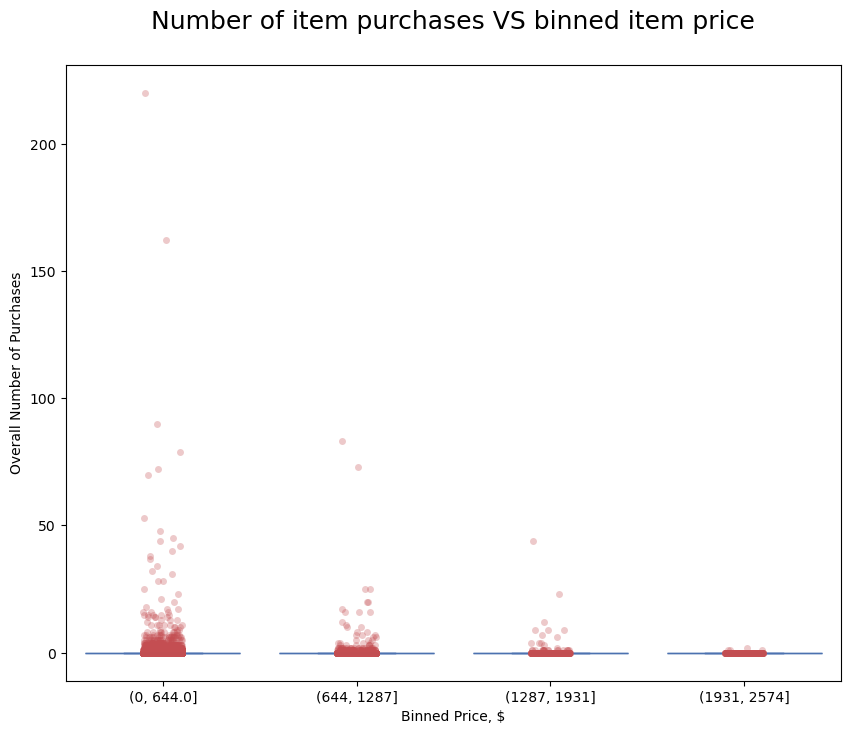

In [228]:
#let's see the distribution of purchases aver price bins
#it's hard to see anything here

plt.figure(figsize=(10,8))
sns.stripplot(data=df_encoded_pivot, 
              y='event_type_purchase', 
              x='price_binned', 
              jitter=.1,
              alpha=.3, 
              marker='o',
              color='r',
             )
sns.boxplot(data=df_encoded_pivot, 
            y='event_type_purchase', 
            x='price_binned',
            showfliers = False,
            fill=True,
            linecolor='b',
             )
plt.title('Number of item purchases VS binned item price\n', fontsize=18)
plt.xlabel('Binned Price, $')
plt.ylabel('Overall Number of Purchases')

Text(0, 0.5, 'Overall Number of Purchases')

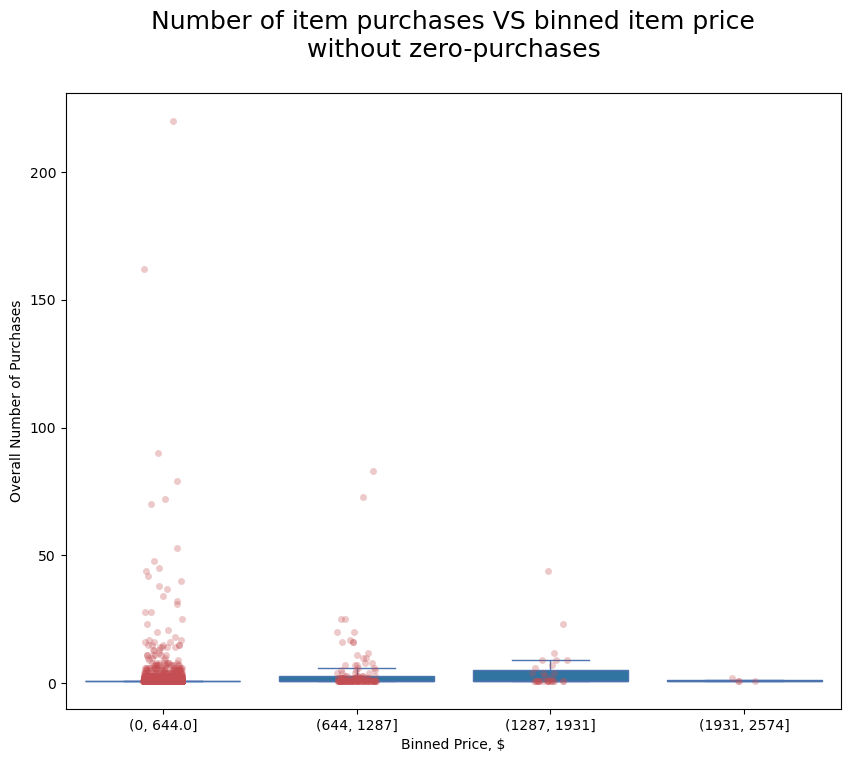

In [229]:
# let's do it for items  with number of puchases > 0

df_encoded_pivot = df_encoded_pivot[df_encoded_pivot['event_type_purchase'] > 0]
df_encoded_pivot

plt.figure(figsize=(10,8))
sns.stripplot(data=df_encoded_pivot, 
              y='event_type_purchase', 
              x='price_binned', 
              jitter=.1,
              alpha=.3, 
              marker='o',
              color='r',
             )
sns.boxplot(data=df_encoded_pivot, 
            y='event_type_purchase', 
            x='price_binned',
            showfliers = False,
            fill=True,
            linecolor='b',
             )
plt.title('Number of item purchases VS binned item price\nwithout zero-purchases\n', fontsize=18)
plt.xlabel('Binned Price, $')
plt.ylabel('Overall Number of Purchases')

Text(0, 0.5, 'Overall Number of Purchases')

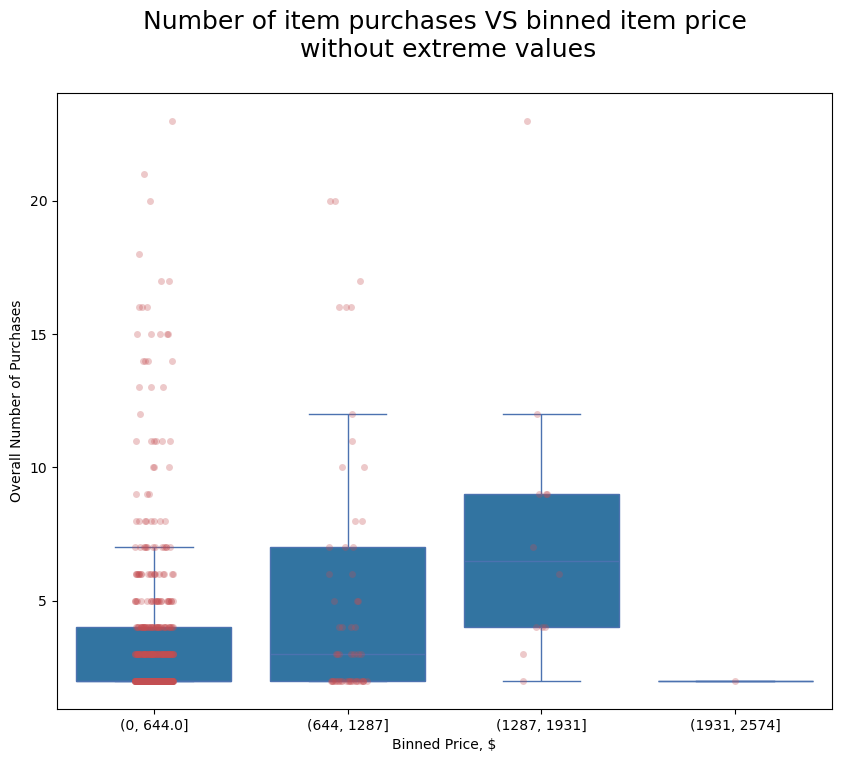

In [230]:
#let's filter out extreme values with 1st and 99th percentile

purchase_threshold = np.percentile(df_encoded_pivot['event_type_purchase'], [1,99])
df_encoded_pivot = df_encoded_pivot[(df_encoded_pivot['event_type_purchase']>purchase_threshold[0])&(df_encoded_pivot['event_type_purchase']<purchase_threshold[1])]

plt.figure(figsize=(10,8))
sns.stripplot(data=df_encoded_pivot, 
              y='event_type_purchase', 
              x='price_binned', 
              jitter=.1,
              alpha=.3, 
              marker='o',
              color='r',
             )
sns.boxplot(data=df_encoded_pivot, 
            y='event_type_purchase', 
            x='price_binned',
            showfliers = False,
            fill=True,
            linecolor='b',
             )
plt.title('Number of item purchases VS binned item price\n without extreme values\n', fontsize=18)
plt.xlabel('Binned Price, $')
plt.ylabel('Overall Number of Purchases')

### **Conclusion**: We can see, that the Q3 of purchase rate increases until 3rd price bin and sharp raise of the purchase rate average in the 3rd bin. However, at the same same time we see that there is a decline in number of items presented within a bin.So we can't conclude confidentally that higher or lower price yiled to higher purchase rates. 

### We can only say that higher priced grouds of items have less fraction of bad-sellers than cheap items groups. Why is that happening? Most probably because dealers of high-price products can't stay long on market if their items show low purchase rate unlike those who sell cheap goods. The reason behind it might be the Markup. Markup = the Gross Profit divided by the Sales Price. For example, based on https://moneygenius.ca/blog/average-product-markup, the markup of cables (such as HDMI cable) can be up to 1000% whereas smartphones markup is only ~79% on average.

In [231]:
#to reinfornce our explanation, let see what products are in the 3rd price bin
#as we expected, smarphones only are present in the 3rd price bin

print('Products in the 3rd bin:')
df_encoded_pivot[df_encoded_pivot['price_binned'] == '(1287, 1931]']

Products in the 3rd bin:


event_type_purchase        price  \
category_code          product_id                                     
electronics.smartphone 1005106                       7  1516.214313   
                       1005124                       9  1641.785616   
                       1005129                       9  1407.409000   
                       1005130                       6  1611.706667   
                       1005132                      12  1415.847844   
                       1005133                       3  1621.781512   
                       1005135                      23  1731.114000   
                       1005138                       2  1744.514634   
                       1005140                       4  1521.914118   
                       1005141                       4  1725.206354   
                       1005143                       4  1546.449831   
                       1005144                       9  1723.266185   

                                   price_binned  
category_code          product_id                
electronics.smartphone 1005106     (1287, 1931]  
                       1005124     (1287, 1931]  
                       1005129     (1287, 1931]  
                       1005130     (1287, 1931]  
                       1005132     (1287, 1931]  
                       1005133     (1287, 1931]  
                       1005135     (1287, 1931]  
                       1005138     (1287, 1931]  
                       1005140     (1287, 1931]  
                       1005141     (1287, 1931]  
                       1005143     (1287, 1931]  
                       1005144     (1287, 1931]

# Question 3: Segmentation of users based on behavior. Are there any segments of customers we can highlight (in terms of spending, conversion rate, number of purchases, number of views, Lifetime Value)?

# We will cluster only regular customers (those who made >= 2 purchases)
## We will try to cluster our customers based on: 

- total spending;
- conversion rate;
- customer value (part of lifetime value).

In [232]:
df_encoded

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,day,month,...,weekday,purchase,session_duration,day_of_week,week_number,hour_of_day,week_of_month,event_type_cart,event_type_purchase,event_type_view
0,2019-10-09 02:46:19+00:00,29900078,2059484601444729123,undefined accessories,peda,1647.40,532353313,47059489-3a63-4353-9eab-0e239d5cb5aa,9,10,...,2,0,0.0,2,41,2,2.0,0,0,1
1,2019-10-21 16:17:11+00:00,1801805,2053013554415534427,electronics.video.tv,artel,231.60,536042235,a65ee34b-7701-4b25-95e7-45a1259e747e,21,10,...,0,0,0.0,0,43,16,3.0,0,0,1
2,2019-10-21 14:42:20+00:00,1004870,2053013555631882655,electronics.smartphone,samsung,284.02,517143806,a9ba13a7-afac-41ca-a3bc-016c580908c3,21,10,...,0,0,0.0,0,43,14,3.0,1,0,0
3,2019-10-03 18:40:22+00:00,5701087,2053013553970938175,auto.accessories.player,jvc,51.48,556492770,799d5c0a-e1f3-4f22-b61d-ab78cfed068c,3,10,...,3,0,0.0,3,40,18,1.0,0,0,1
4,2019-10-19 08:58:51+00:00,5300097,2053013563173241677,undefined accessories,remington,39.87,561838859,dd474f7f-0559-41f5-8be0-9d0912cf2b1b,19,10,...,5,0,0.0,5,42,8,3.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2019-10-18 23:56:40+00:00,4700534,2053013560899928785,auto.accessories.videoregister,inspector,308.86,513717363,a4e84292-afee-4ad2-a25a-b6add13b9442,18,10,...,4,0,0.0,4,42,23,3.0,0,0,1
299996,2019-10-14 17:19:28+00:00,26401462,2053013563651392361,undefined accessories,lucente,124.07,549975096,32887e54-fc30-4045-b875-ec58587ab938,14,10,...,0,0,0.0,0,42,17,2.0,0,0,1
299997,2019-10-09 18:32:24+00:00,1003535,2053013555631882655,electronics.smartphone,samsung,460.50,558558445,7593112b-0b1e-404e-b32a-2e8ca0e298fb,9,10,...,2,0,0.0,2,41,18,2.0,0,0,1
299998,2019-10-06 04:30:50+00:00,1005162,2053013555631882655,electronics.smartphone,xiaomi,295.76,546222842,3f51134e-b9de-482e-b555-768dabc9cb50,6,10,...,6,0,0.0,6,40,4,1.0,0,0,1


In [233]:
#let's create a tables grouped by our customers

customers_pivot_df = df_encoded.groupby(by='user_id').agg(number_views= ('event_type_view','sum'),
                                                          number_purchases=('event_type_purchase','sum'),
                                                          avg_number_purchases=('event_type_purchase','mean'),
                                                          total_spending=('price','sum'),
                                                          avg_spending = ('price','mean')
                                                           )
customers_pivot_df.sort_values(by='number_purchases', ascending=False)

,number_views,number_purchases,avg_number_purchases,total_spending,avg_spending
user_id,,,,,
523974502,4,5,0.500000,2584.13,258.413000
513320236,2,4,0.666667,2340.47,390.078333
560647844,1,3,0.750000,2607.98,651.995000
515878486,0,3,1.000000,417.23,139.076667
560825006,0,3,1.000000,419.63,139.876667
...,...,...,...,...,...
519036494,1,0,0.000000,119.95,119.950000
519036504,1,0,0.000000,159.33,159.330000
519036514,2,0,0.000000,903.55,451.775000


In [234]:
# Customer Value = Average Transaction Size x Average Number of Transactions 
# let's create a table with our regular customers

customers_pivot_df['conversion_rate'] = round(customers_pivot_df['number_purchases']/customers_pivot_df['number_views'],2)
customers_pivot_df['cv'] = round(customers_pivot_df['avg_spending']*customers_pivot_df['avg_number_purchases'],2)
reg_customers_pivot_df = customers_pivot_df[customers_pivot_df['number_purchases']>=2]
reg_customers_pivot_df = reg_customers_pivot_df.drop(columns=['number_views','number_purchases','avg_spending','avg_number_purchases'])
#reg_customers_pivot_df = reg_customers_pivot_df[reg_customers_pivot_df['conversion_rate']!=float('inf')]
reg_customers_pivot_df['conversion_rate'] = reg_customers_pivot_df[['conversion_rate']].replace(float('inf'), 7) #let's replace infinite conversion with high value 
reg_customers_pivot_df.head()

,total_spending,conversion_rate,cv
user_id,,,
512386086,8454.46,0.18,66.05
512409624,2200.56,7.00,733.52
512447778,1928.35,1.00,241.04
512551328,1520.81,0.67,62.07
512578293,172.98,7.00,86.49


Text(0.5, 1.0, 'Distribution of Total Spendings\n')

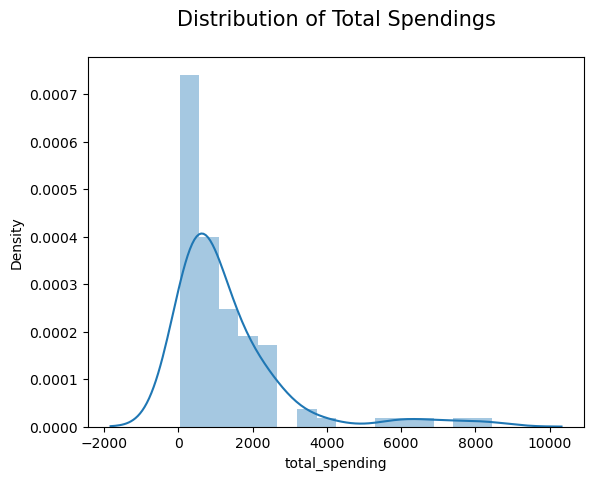

In [235]:
#let's examine the distribution of the spendings

sns.distplot(reg_customers_pivot_df['total_spending'])
plt.title('Distribution of Total Spendings\n', fontsize=15)

In [236]:
#the distribution of regular cutomers' total spengings in this subset isn't that wide as expected, so we can skip filtering extreme values


#let's filter out extreme values with 1st and 99th percentile

# spending_threshold = np.percentile(reg_customers_pivot_df['total_spending'], [1,99])
# spending_threshold
# reg_customers_pivot_df_filtered = reg_customers_pivot_df[(reg_customers_pivot_df['total_spending']>=spending_threshold[0])&(reg_customers_pivot_df['total_spending']<=spending_threshold[1])]
# reg_customers_pivot_df_filtered.head(n=5)
#let's examine the distribution of the filtered spendings
# sns.distplot(reg_customers_pivot_df_filtered['total_spending'])

In [237]:
#let's create segments of our customers

from sklearn.cluster import KMeans
# X = reg_customers_pivot_df_filtered[['total_spending','conversion_rate','cv']]

X = reg_customers_pivot_df[['total_spending','conversion_rate','cv']]
X.head()

,total_spending,conversion_rate,cv
user_id,,,
512386086,8454.46,0.18,66.05
512409624,2200.56,7.00,733.52
512447778,1928.35,1.00,241.04
512551328,1520.81,0.67,62.07
512578293,172.98,7.00,86.49


In [238]:
X['total_spending'].mean()

1321.2985999999999

In [239]:
#let's standardirize the scale of our features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:,0].mean()

8.104628079763643e-17

In [240]:
#let's see how many clusters do we need

inertia = []
for k in range(1,15):
    kmeans=KMeans(n_clusters=k, random_state=17)
    kmeans.fit(X_scaled)
    inertia.append([k, kmeans.inertia_])
    
inertia

[[1, 300.00000000000006],
 [2, 182.5002878831894],
 [3, 110.77013859030707],
 [4, 58.81166315348591],
 [5, 46.350588159165866],
 [6, 36.32714553464936],
 [7, 28.707515605547997],
 [8, 24.31914180688442],
 [9, 21.329307216656343],
 [10, 18.449504165716068],
 [11, 16.27807236565052],
 [12, 14.103895258774529],
 [13, 12.346644382373208],
 [14, 10.49157299283006]]

In [241]:
import seaborn.objects as so

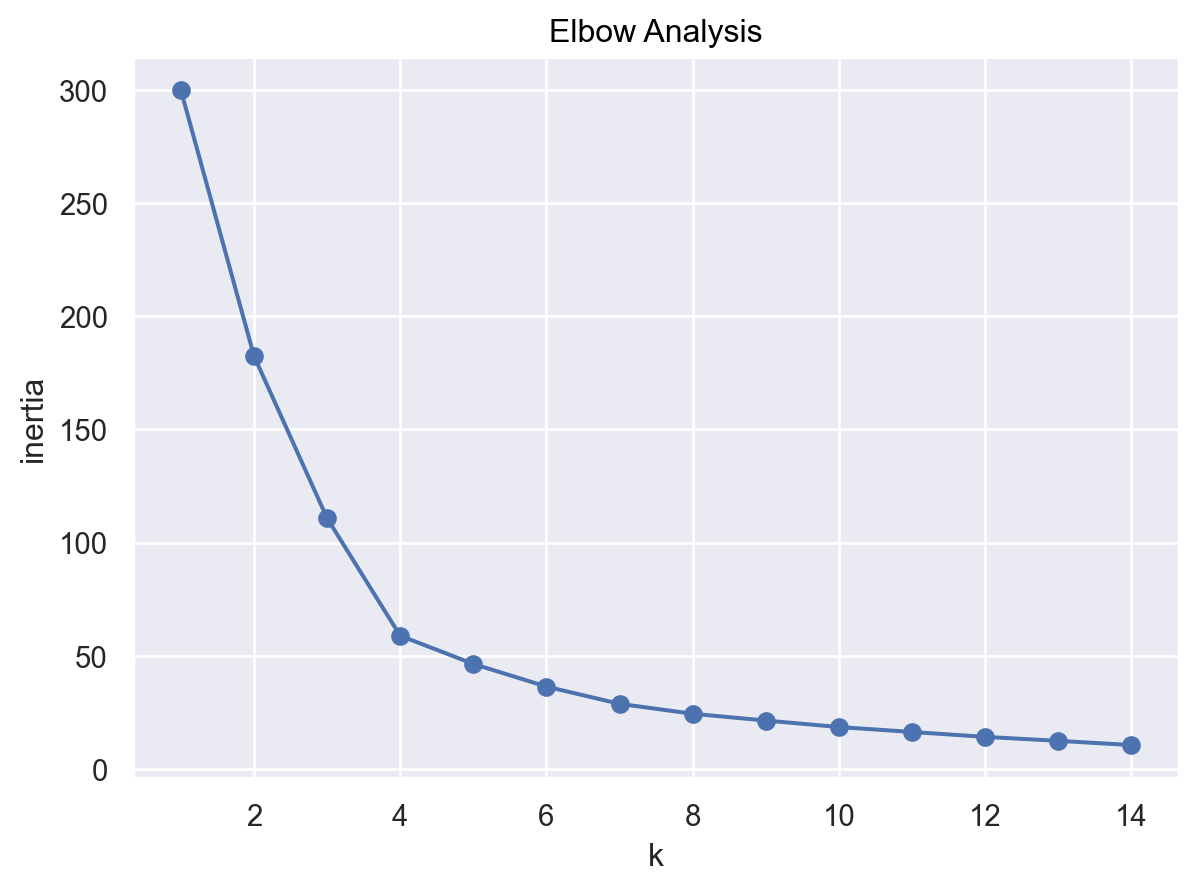

In [242]:
#based on 'elbow method', we can pick ~4 clusters
(
    pd.DataFrame(inertia, columns=['k','inertia'])
    .pipe(so.Plot, x='k', y='inertia')
    .add(so.Line(marker='o'))
    .label(title='Elbow Analysis')
)

In [243]:
#let's see how many clusters do we need based on silhouette analysis

from sklearn.metrics import silhouette_score 
silhouette = []
for k in range(2,15): 
    kmeans=KMeans(n_clusters=k, random_state=17)
    kmeans.fit(X_scaled)
    silhouette.append([k, silhouette_score(X_scaled, kmeans.labels_)])
silhouette

[[2, 0.4912502057565426],
 [3, 0.5535551245621014],
 [4, 0.6021023086290294],
 [5, 0.5285225826115059],
 [6, 0.5062457288254281],
 [7, 0.5254866627012184],
 [8, 0.5037480840906674],
 [9, 0.46503060172281535],
 [10, 0.4633323378366394],
 [11, 0.43776238641452714],
 [12, 0.4067592084192123],
 [13, 0.4405000138705956],
 [14, 0.43575154146244827]]

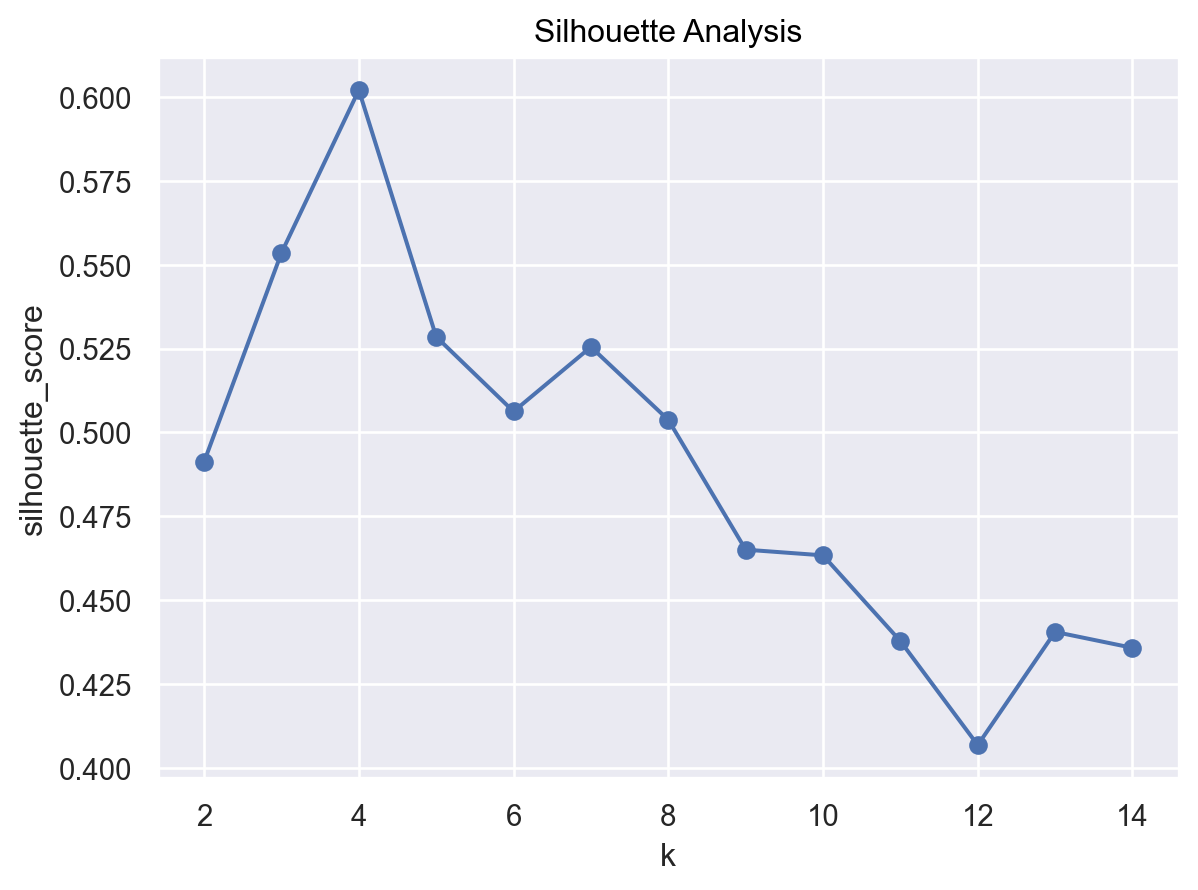

In [244]:
#based on silhouette analysis, we can pick 4 clusters

(
    pd.DataFrame(silhouette, columns=['k','silhouette_score'])
    .pipe(so.Plot, x='k', y='silhouette_score')
    .add(so.Line(marker='o'))
    .label(title='Silhouette Analysis')
)

In [245]:
# based on both silhouette analysis and elbow analysis, we will pick the mean between their results -> 4 clusters

In [246]:
kmeans=KMeans(n_clusters=4, random_state=17)

In [247]:
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=17)

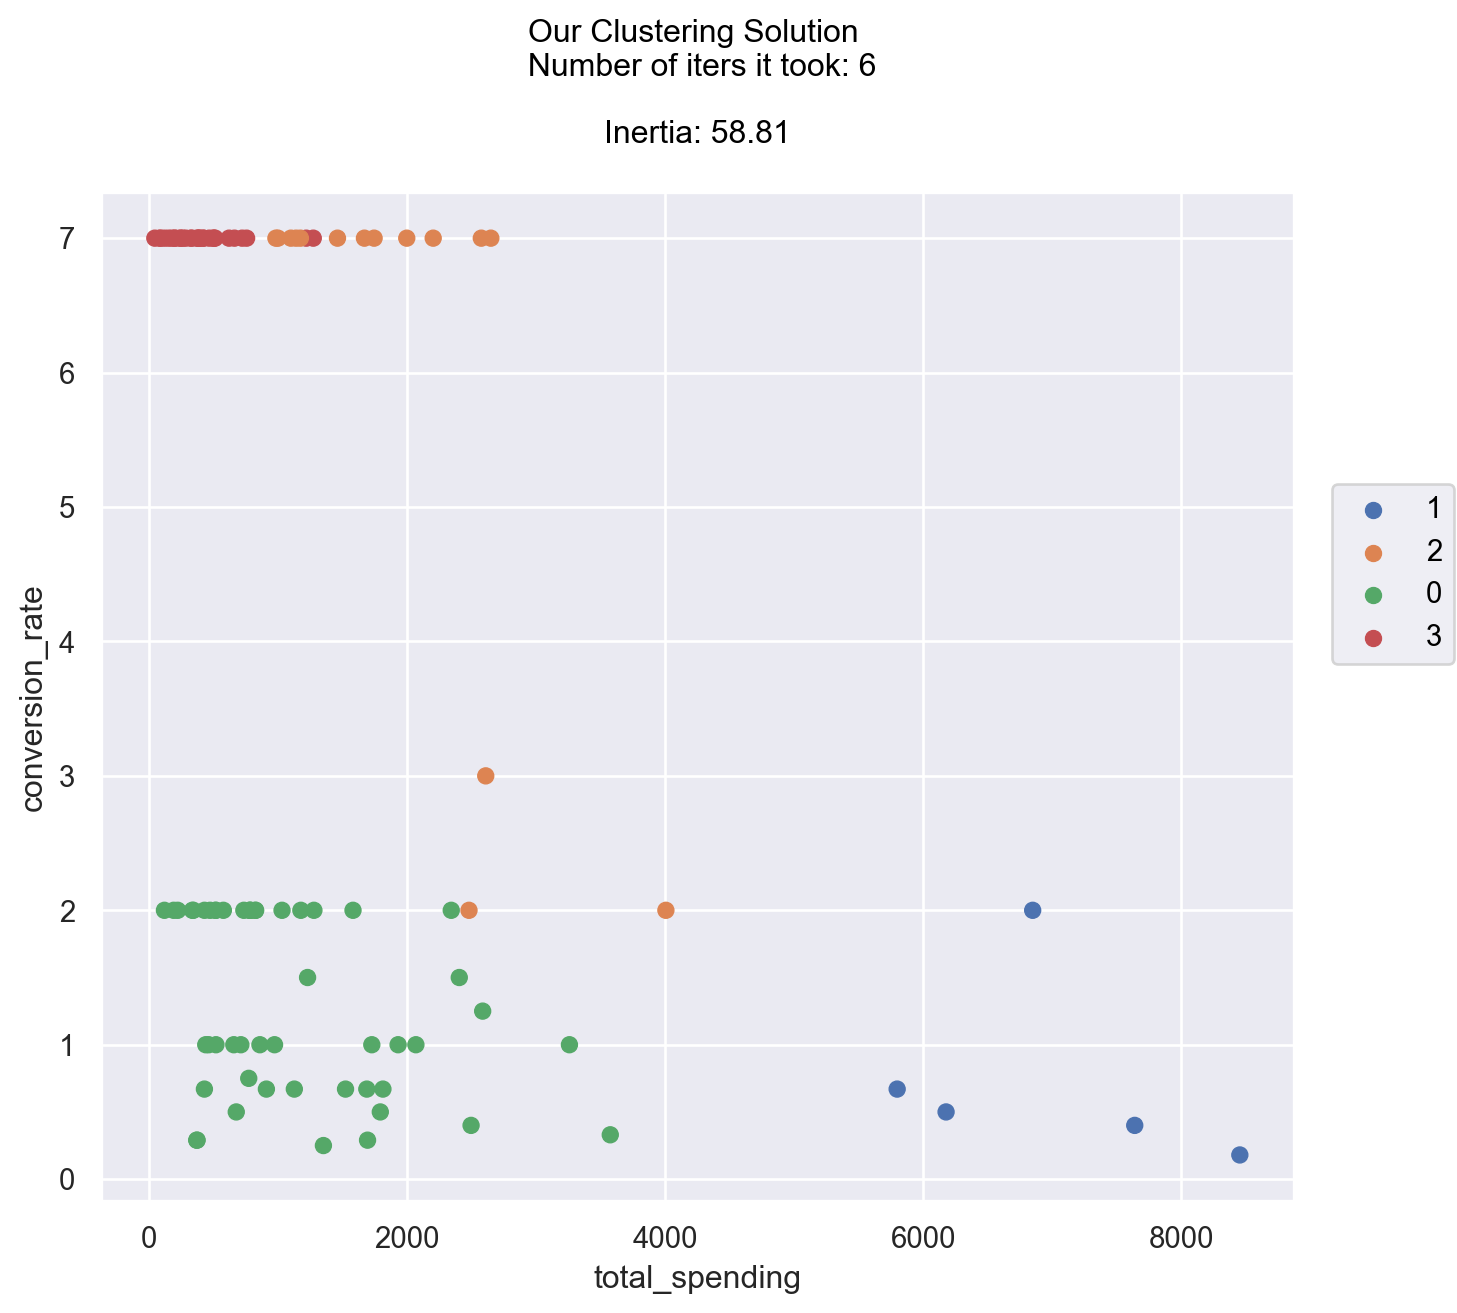

In [248]:
(
    so.Plot(data=X, x='total_spending',y='conversion_rate', color=kmeans.labels_.astype(str),)
    .add(so.Dot())
    .layout(size=(7,7))
    .label(title='Our Clustering Solution \n Number of iters it took: ' + str(kmeans.n_iter_) + '\n\nInertia: ' + str(round(kmeans.inertia_, 2))+'\n')
)

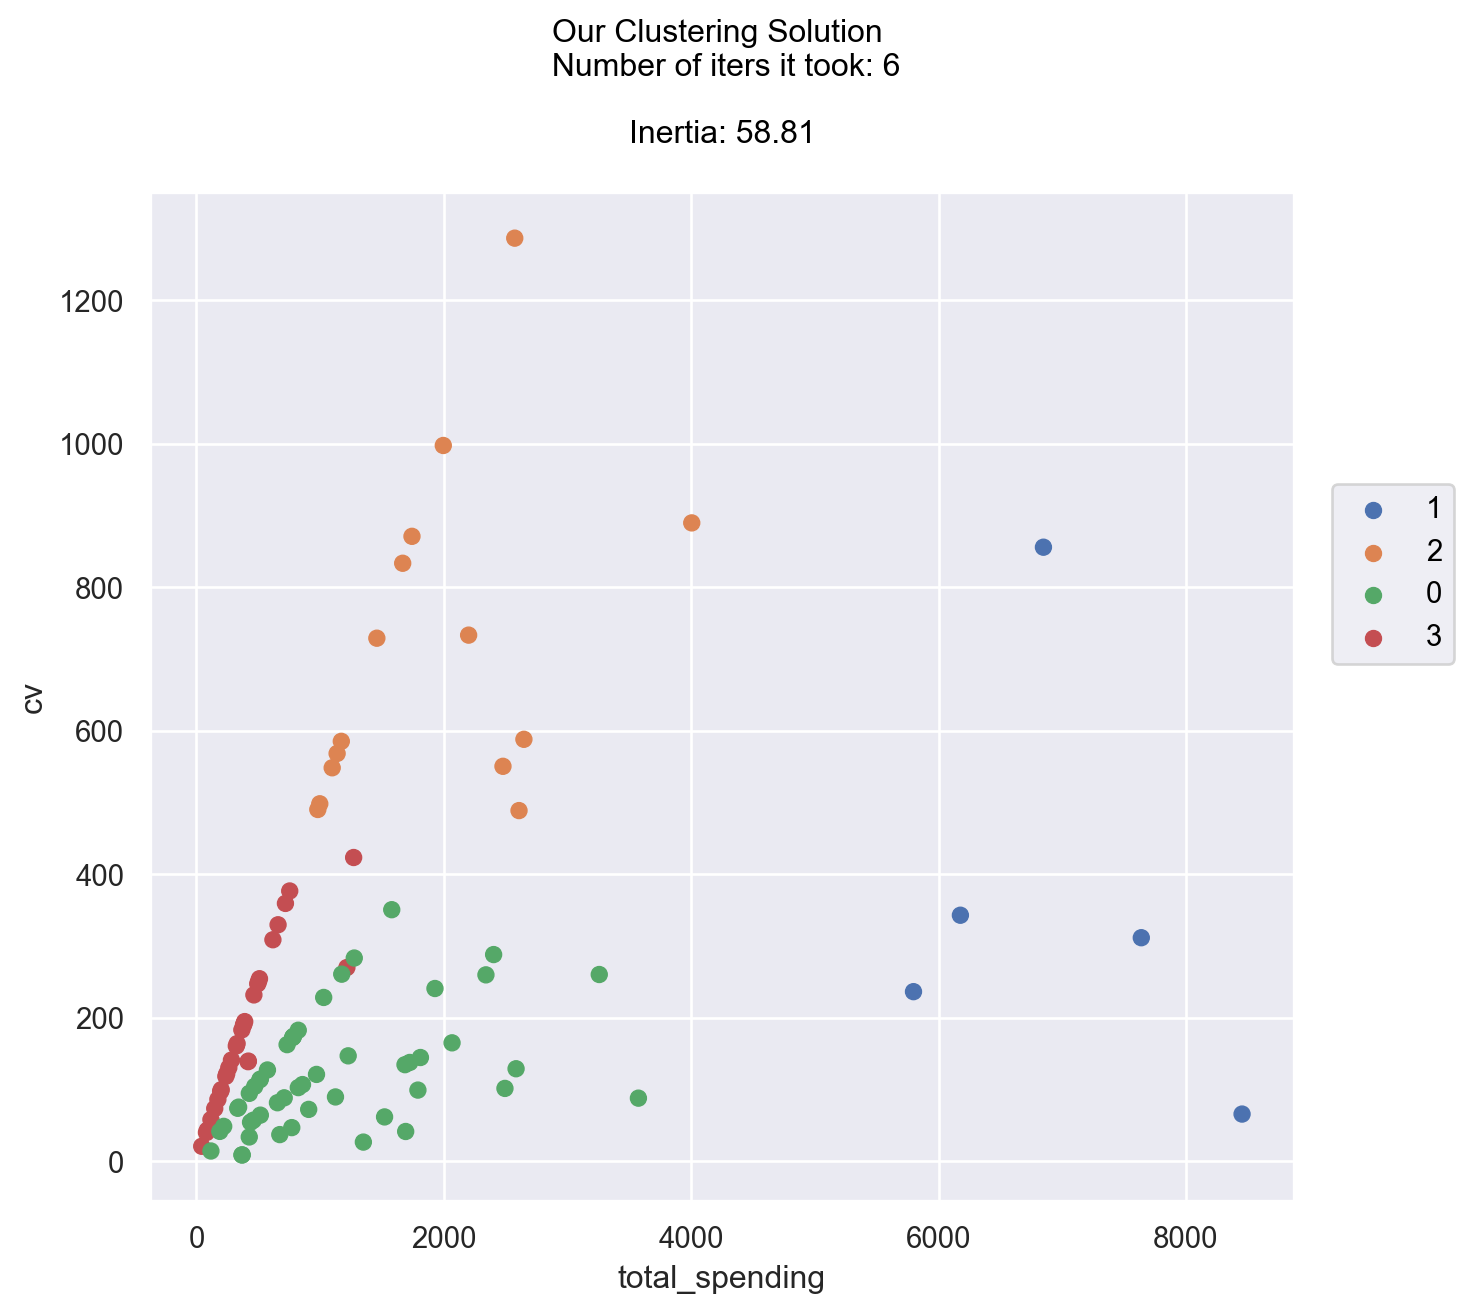

In [249]:
(
    so.Plot(data=X, x='total_spending',y='cv', color=kmeans.labels_.astype(str))
    .add(so.Dot())
    .layout(size=(7,7))
    .label(title='Our Clustering Solution \n Number of iters it took: ' + str(kmeans.n_iter_) + '\n\nInertia: ' + str(round(kmeans.inertia_, 2))+'\n')
)

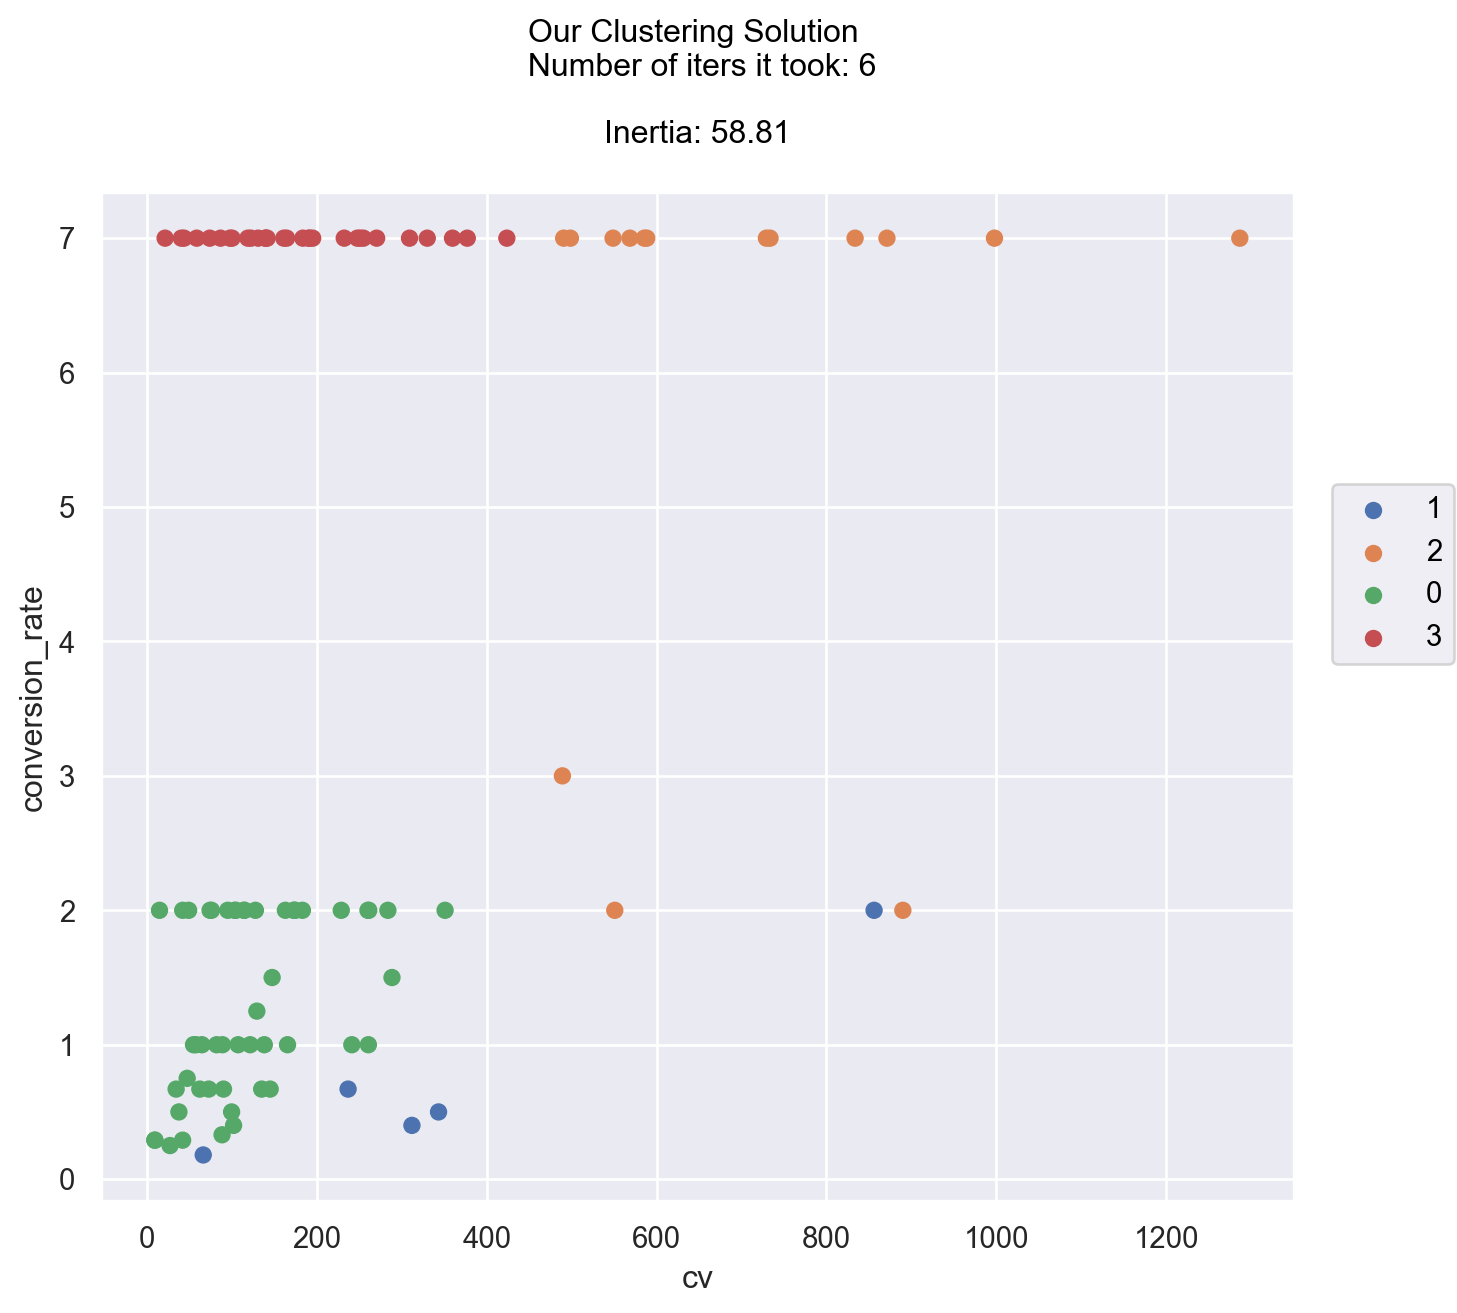

In [250]:
(
    so.Plot(data=X, y='conversion_rate',x='cv', color=kmeans.labels_.astype(str))
    .add(so.Dot())
    .layout(size=(7,7))
    .label(title='Our Clustering Solution \n Number of iters it took: ' + str(kmeans.n_iter_) + '\n\nInertia: ' + str(round(kmeans.inertia_, 2))+'\n')
)

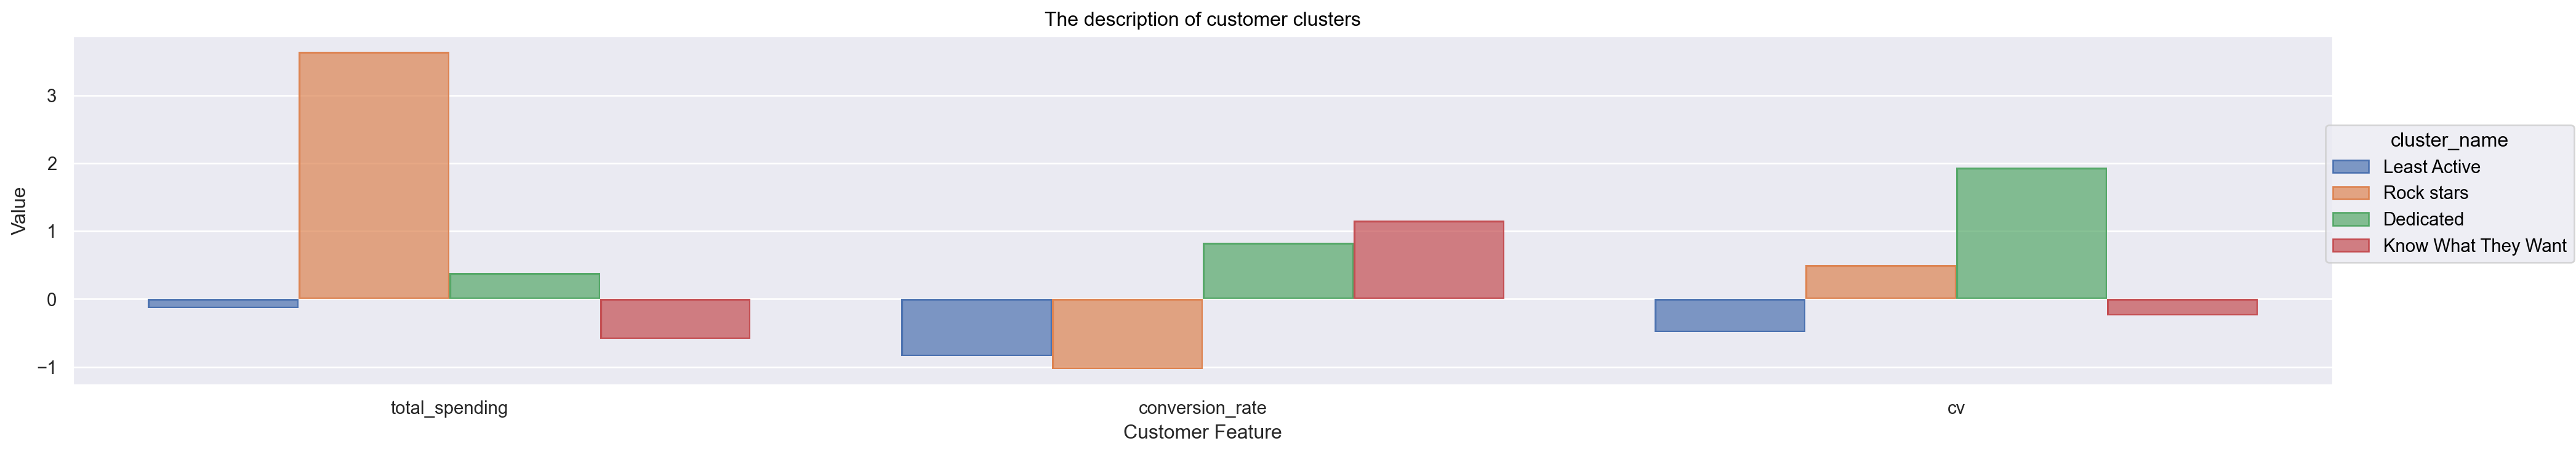

In [251]:
#clusters visualization
(
    pd.DataFrame(kmeans.cluster_centers_, columns=X.columns, index=['Least Active','Rock stars','Dedicated','Know What They Want'])
    .rename_axis(index='cluster_name')
    .reset_index()
    .melt(id_vars='cluster_name', var_name='customer_features')
    .pipe(so.Plot, x='customer_features', y='value', color='cluster_name')
    .add(so.Bar(), so.Dodge())
    .layout(size=(20, 4))
    .label(title='The description of customer clusters', x='Customer Feature', y='Value')
)

In [252]:
X['cluster_label'] = kmeans.labels_.astype(str)
X.head()

,total_spending,conversion_rate,cv,cluster_label
user_id,,,,
512386086,8454.46,0.18,66.05,1
512409624,2200.56,7.00,733.52,2
512447778,1928.35,1.00,241.04,0
512551328,1520.81,0.67,62.07,0
512578293,172.98,7.00,86.49,3


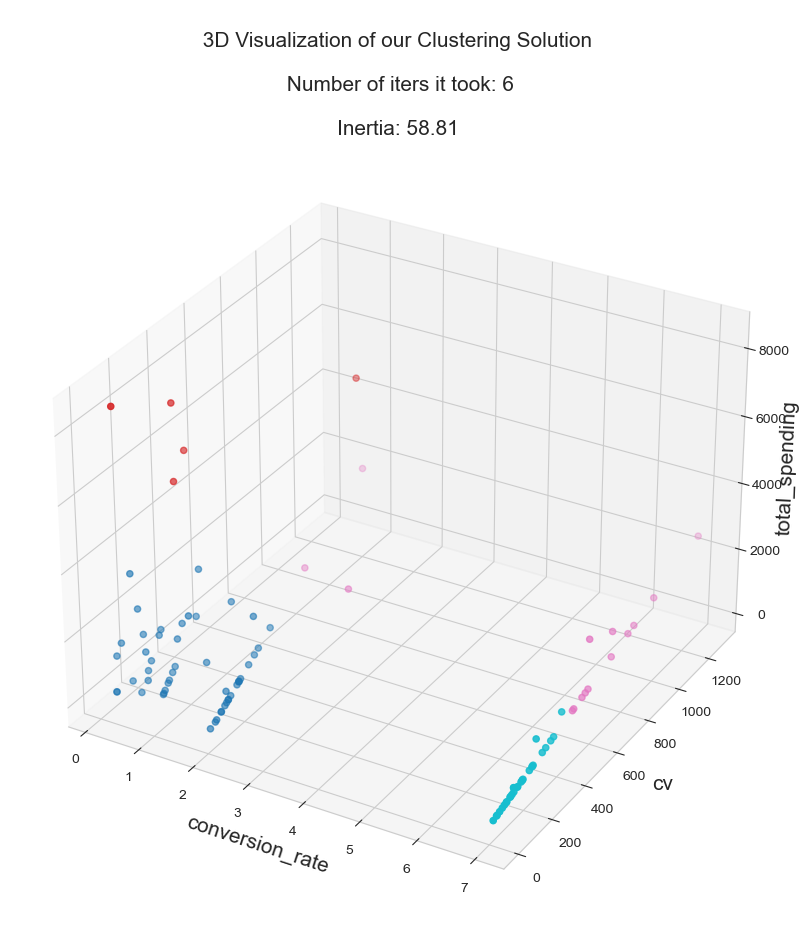

In [253]:
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style('whitegrid', {'axes.grid':False})

fig = plt.figure(figsize=(10,17))

#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')

x = X['conversion_rate']
y = X['cv']
z = X['total_spending']

ax.scatter(x,y,z,c=X[['cluster_label']],marker='o',cmap='tab10')
ax.set_xlabel('conversion_rate', fontsize=15)
ax.set_ylabel('cv', fontsize=15)
ax.set_zlabel('total_spending\n', fontsize=15)
ax.set_title(label=('\n 3D Visualization of our Clustering Solution \n'
                    +'\n Number of iters it took: ' 
                    + str(kmeans.n_iter_) + '\n\nInertia: ' 
                    + str(round(kmeans.inertia_, 2))
                   ), 
             fontsize=15
            )
plt.show()

### **Conclusion:** we see there are 4 customer clusters associated with distinctly different behavior patterns. The e-commerce platform can take advantage of this model to adjust the user-experience, ads, and recommendation system to differnet types of users.

## The end of Kirill's part ↑